# Examen Final – Parte práctica
## David Moreno
### Dataset King County
Esta base de datos es un registro de cada unidad de vivienda vendida en la ciudad de  King County durante un periodo de 12 meses. A continuación se presenta las variables del diccionario:

### Nombre de las columnas y descripción del dataset
* **id** - unique identified for a house
* **dateDate** - house was sold
* **pricePrice** -  is prediction target
* **bedroomsNumber** -  of Bedrooms/House
* **bathroomsNumber** -  of bathrooms/bedrooms
* **sqft_livingsquare** -  footage of the home
* **sqft_lotsquare** -  footage of the lot
* **floorsTotal** -  floors (levels) in house
* **waterfront** - House which has a view to a waterfront
* **view** - Has been viewed
* **condition** - How good the condition is ( Overall )
* **grade** - overall grade given to the housing unit, based on King County grading system
* **sqft_above** - square footage of house apart from basement
* **sqft_basement** - square footage of the basement
* **yr_built** - Built Year
* **yr_renovated** - Year when house was renovated
* **zipcode** - zip
* **lat** - Latitude coordinate
* **long** - Longitude coordinate
* **sqft_living15** - The square footage of interior housing living space for the nearest 15 neighbors
* **sqft_lot15** - The square footage of the land lots of the nearest 15 neighbors

Utilizando los métodos aprendidos en el curso ***(identificación de valores atípicos, ANOVA, regresión lineal y regresión múltiple)***  construya modelos que le permitan dar respuesta a cada una de las preguntas de negocio planteadas. Recuerde tambien **incluir las conclusiones y un análisis de los resultados obtenidos**. Todos los literales son independientes entre sí:

Teniendo en cuenta la base de datos suministrada responda las siguientes preguntas de negocio.

 <b> Punto 1 Realice el analisis explotarorio de los datos (5%) </b>
- </b> Organice la base de datos, es decir haga una tratamiento para los datos faltantes, y en caso de eliminar columnas argumente. (2%)
- </b> Manejo de outlayers nota:los outlayers deben conservarse si tienen el potencial de revelar información útil sobre las relaciones en nuestros datos, tenga presente esto en su analisis.(3%)
- </b> Identifique las variables categoricas y realice un manejo de estas con variables dummy, la elección de la variable categorica debe estar agumentado.(5%)



In [148]:
#Implemente su respuesta en esta celda
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


d_kc_house=pd.read_csv('kc_house_data.csv')

d_kc_house




,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,0.0,0.0,...,8,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,0.0,0.0,...,8,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,0.0,0.0,...,7,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007
21595,291310100,1/16/2015,400000.0,3,2.50,1600,2388,2.0,NaN,0.0,...,8,1600,0.0,2004,0.0,98027,47.5345,-122.069,1410,1287


- Primero vemos la dimensión de nuestro dataset, tiene 21 un mil y miramos en primera instancia variables que representen la misma información. Vemos que la variable id no nos sirve para nuestro análisis, para la variable date hacemos una comparación por años de el precio de las casas y vemos un incremento pero no significativo en nuestros datos. y para la variable zipcode, podemos obtener esa misma información en la variable latitud y longitud que representan la posición geografica de la casa, y que serviria de la misma información el zipcode por eso eliminamos estas 3 columnas.

In [149]:
d_kc_house.drop(['id','date','zipcode'],axis=1,inplace=True)

In [150]:
d_kc_house.isnull().sum()*100/d_kc_house.shape[0]

price             0.000000
bedrooms          0.000000
bathrooms         0.000000
sqft_living       0.000000
sqft_lot          0.000000
floors            0.000000
waterfront       11.001528
view              0.291707
condition         0.000000
grade             0.000000
sqft_above        0.000000
sqft_basement     0.000000
yr_built          0.000000
yr_renovated     17.789508
lat               0.000000
long              0.000000
sqft_living15     0.000000
sqft_lot15        0.000000
dtype: float64

- Aquí, al calcular el porcentaje de valores nulos, observamos que la columna con más valores faltantes es 'yr_renovated'. Los valores de 0 en esta columna podrían interpretarse como la ausencia de registros de renovación para esas casas. Con el objetivo de guardar información relevante, hemos decidido crear una nueva columna con valores binarios (1,0) donde 1 indica que la casa ha experimentao renovación y 0 indica que no ha habido ninguna renovación registrada. 

### Limpieza de los datos

In [151]:
#create a new column if !=0 yr_renovated  =1 else =0
d_kc_house['yr_renovated_B']=np.where(d_kc_house['yr_renovated']!=0,1,0)
d_kc_house.isnull().sum()*100/d_kc_house.shape[0]
d_kc_house.drop('yr_renovated',axis=1,inplace=True)

#for view create a category if nan ='NS'
d_kc_house['waterfront']=d_kc_house['waterfront'].fillna('NS')

#in view column replace nan witth the most frequent value   
d_kc_house['view']=d_kc_house['view'].fillna(d_kc_house['view'].mode()[0])

d_kc_house['sqft_basement']=np.where(d_kc_house['sqft_basement']=='?',np.nan,d_kc_house['sqft_basement'])
d_kc_house['sqft_basement']=d_kc_house['sqft_basement'].astype('float')
d_kc_house['sqft_basement']=d_kc_house['sqft_basement'].fillna(d_kc_house['sqft_basement'].mean())

d_kc_house['yr_built']=pd.to_datetime(d_kc_house['yr_built'],format='%Y')
d_kc_house['yr_built']=d_kc_house['yr_built'].dt.year
d_kc_house['yr_built']=pd.cut(d_kc_house['yr_built'],bins=[1900,1949,1999,2015],labels=['1900-1949','1950-1999','2000-2015'])
d_kc_house['yr_built'].value_counts()

d_kc_house['yr_built'].fillna(d_kc_house['yr_built'].mode()[0],inplace=True)

d_kc_house['waterfront'].replace(d_kc_house['waterfront'].mode()[0],'NS',inplace=True)



d_kc_house.isnull().sum()*100/d_kc_house.shape[0]

price             0.0
bedrooms          0.0
bathrooms         0.0
sqft_living       0.0
sqft_lot          0.0
floors            0.0
waterfront        0.0
view              0.0
condition         0.0
grade             0.0
sqft_above        0.0
sqft_basement     0.0
yr_built          0.0
lat               0.0
long              0.0
sqft_living15     0.0
sqft_lot15        0.0
yr_renovated_B    0.0
dtype: float64

Para la limpieza de los datos, creamos la variable yr_renovated_b la cual es de (1,0) representando si se hizo o no un registro. Para la columna de vacios de waterfron creamos una categoria llamada 'NS'. Para la variable 'view' llenamos los valores vacios con la moda. En la columna de 'sqft_basement' quitamos valores que habia en nuestro dataset como lo es ? y llenamos con la media. Y otra variable categorica que creee fue la de separar los años por 1990-1949,1949-1999, y 1995 a 2015 para no perder esta información y ver si nuestro modelo de regresión puede mejorar.

- Ahora que ya tenemos nuestros datos limpios miramos las distribuciones y sus descriptivos para las variables númericas.

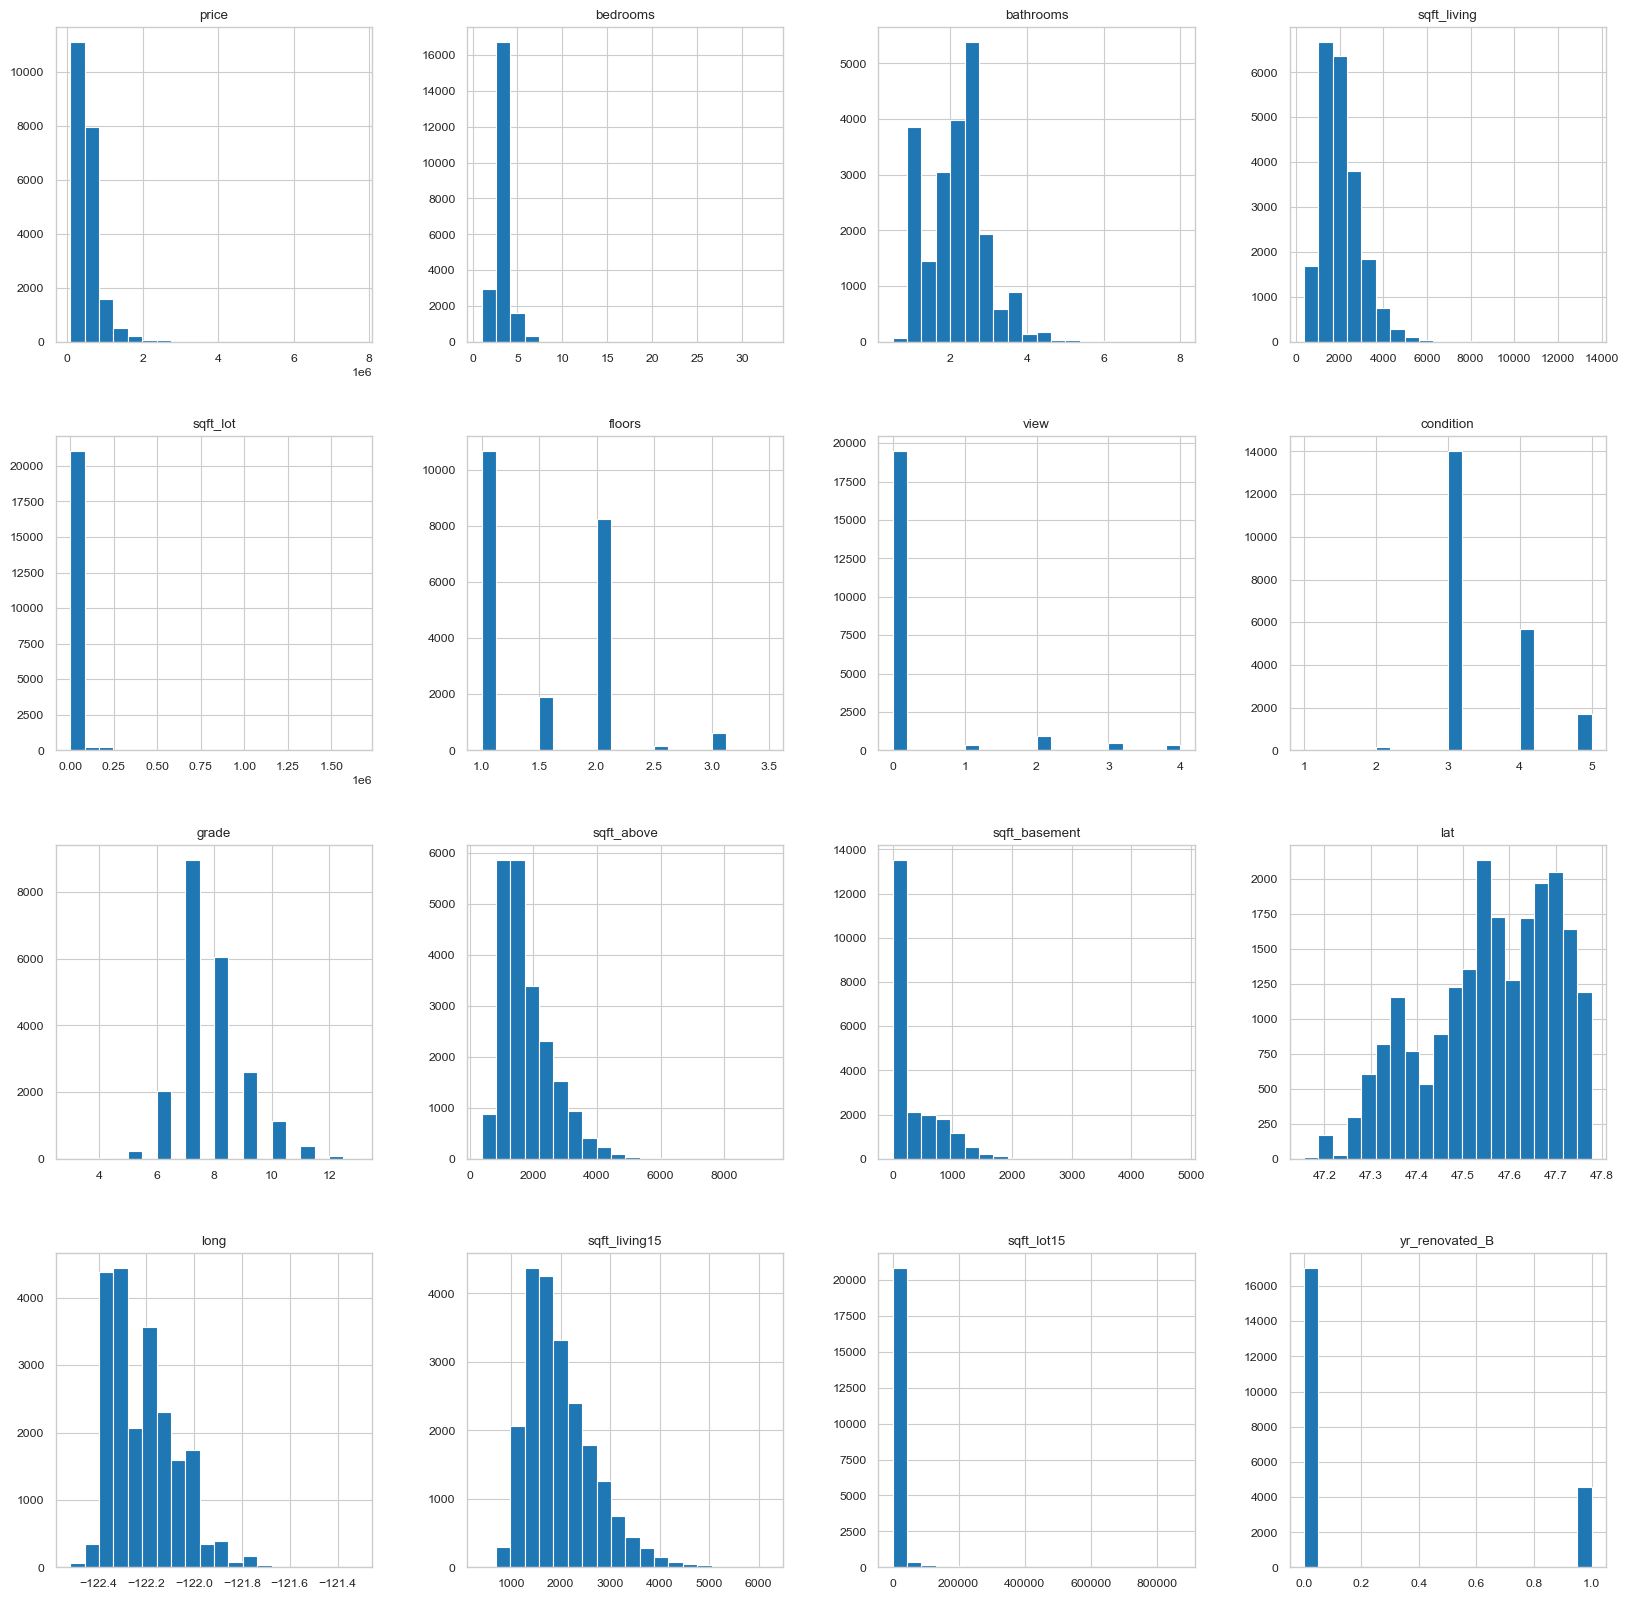

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,grade,sqft_above,sqft_basement,lat,long,sqft_living15,sqft_lot15,yr_renovated_B
count,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.233181,3.409825,7.657915,1788.596842,291.851724,47.560093,-122.213982,1986.620318,12758.283512,0.212344
std,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.764673,0.650546,1.173200,827.759761,437.822440,0.138552,0.140724,685.230472,27274.441950,0.408977
min,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,1.000000,3.000000,370.000000,0.000000,47.155900,-122.519000,399.000000,651.000000,0.000000
25%,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,47.471100,-122.328000,1490.000000,5100.000000,0.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,3.000000,7.000000,1560.000000,0.000000,47.571800,-122.231000,1840.000000,7620.000000,0.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,4.000000,8.000000,2210.000000,550.000000,47.678000,-122.125000,2360.000000,10083.000000,0.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,4.000000,5.000000,13.000000,9410.000000,4820.000000,47.777600,-121.315000,6210.000000,871200.000000,1.000000


In [152]:

#plot the histogram of the columns
d_kc_house.hist(figsize=(20,20),bins=20)
plt.show()

#plot descritive of each column
d_kc_house.describe()



- Aqui vemos que arreglamos los datos, vemos que yr_renovated es una variable categorica. Y vemos otras distribuciones. Sin embargo para la variable price que nos interesa para este ejercicio, vemos que su distribución de probabilidad parece con valores atipicos bastante altos. Para el desarrollo y manejo de estos outliers vamos a tomar la variable price con dos desviaciones estandar y ver como se ve la distribución con ese cambio.

### Outliers

Para quitar los Outliers yo voy a quitar el precio a dos desviaciones estandar



In [153]:
mean_price = d_kc_house['price'].mean()
std_price = d_kc_house['price'].std()


lower_bound = mean_price - 2 * std_price
upper_bound = mean_price + 2 * std_price

# Selecciona los outliers

outliers = d_kc_house[(d_kc_house['price'] < lower_bound) | (d_kc_house['price'] > upper_bound)]

#select the data without outliers
d_kc_house=d_kc_house[(d_kc_house['price'] > lower_bound) & (d_kc_house['price'] < upper_bound)]

d_kc_house.shape

(20756, 18)

Nuestro dataset sigue siendo bastante grande con 20756, luego vemos que quitamos más o menos 1000 datos al quitar nuestros outliers.

- Veamos como nos quedan nuestros datos 

In [154]:
d_kc_house.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,grade,sqft_above,sqft_basement,lat,long,sqft_living15,sqft_lot15,yr_renovated_B
count,2.075600e+04,20756.000000,20756.000000,20756.000000,2.075600e+04,20756.000000,20756.000000,20756.00000,20756.000000,20756.000000,20756.000000,20756.000000,20756.000000,20756.000000,20756.000000,20756.000000
mean,4.877262e+05,3.341492,2.065451,1998.126277,1.468309e+04,1.480415,0.184477,3.40687,7.560513,1725.686548,272.984400,47.557786,-122.213318,1938.339275,12495.600453,0.209048
std,2.244543e+05,0.912440,0.718717,798.485446,4.004046e+04,0.536986,0.666890,0.64740,1.063917,744.431597,410.706678,0.140381,0.141988,632.294177,26504.409618,0.406639
min,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,1.00000,3.000000,370.000000,0.000000,47.155900,-122.519000,399.000000,651.000000,0.000000
25%,3.170000e+05,3.000000,1.500000,1407.250000,5.000000e+03,1.000000,0.000000,3.00000,7.000000,1180.000000,0.000000,47.462900,-122.330000,1470.000000,5060.000000,0.000000
50%,4.400000e+05,3.000000,2.250000,1870.000000,7.520500e+03,1.000000,0.000000,3.00000,7.000000,1530.000000,0.000000,47.568200,-122.231000,1810.000000,7560.000000,0.000000
75%,6.132750e+05,4.000000,2.500000,2460.000000,1.040000e+04,2.000000,0.000000,4.00000,8.000000,2130.000000,510.000000,47.679400,-122.123000,2300.000000,9926.250000,0.000000
max,1.270000e+06,33.000000,7.500000,7480.000000,1.651359e+06,3.500000,4.000000,5.00000,12.000000,7320.000000,2720.000000,47.777600,-121.315000,5790.000000,871200.000000,1.000000


- Ahora vemos como están las distribuciones con los datos ya sin outliers


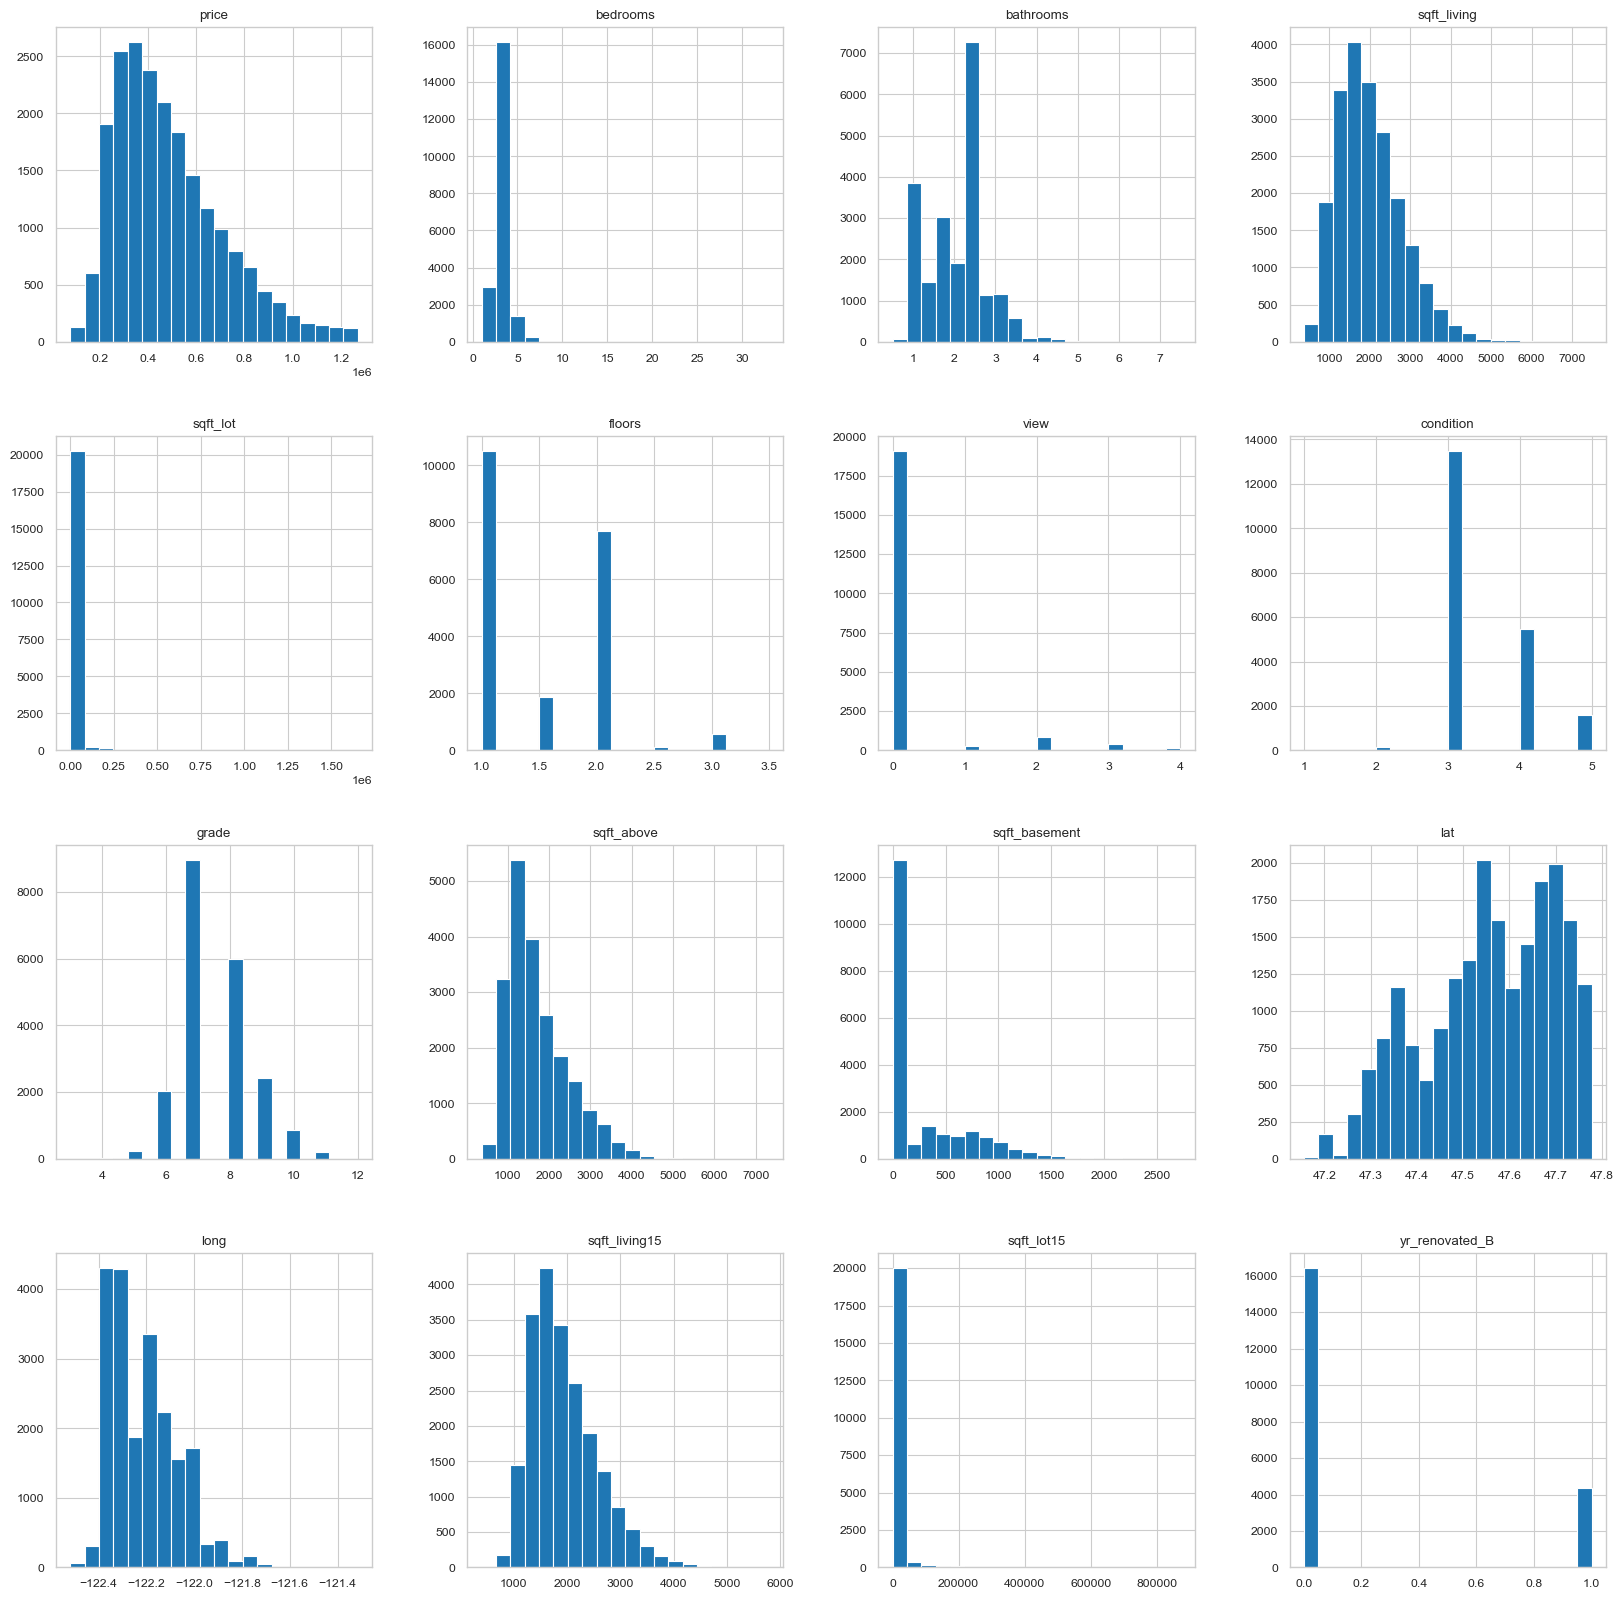

In [155]:
d_kc_house.hist(figsize=(20,20),bins=20)
plt.show()


Vemos en la gráfica como la distribución de probabilida de la variable price cambia y tiene una que ya no tiene outliers muy pronunciados.

### Análisis de correlación 

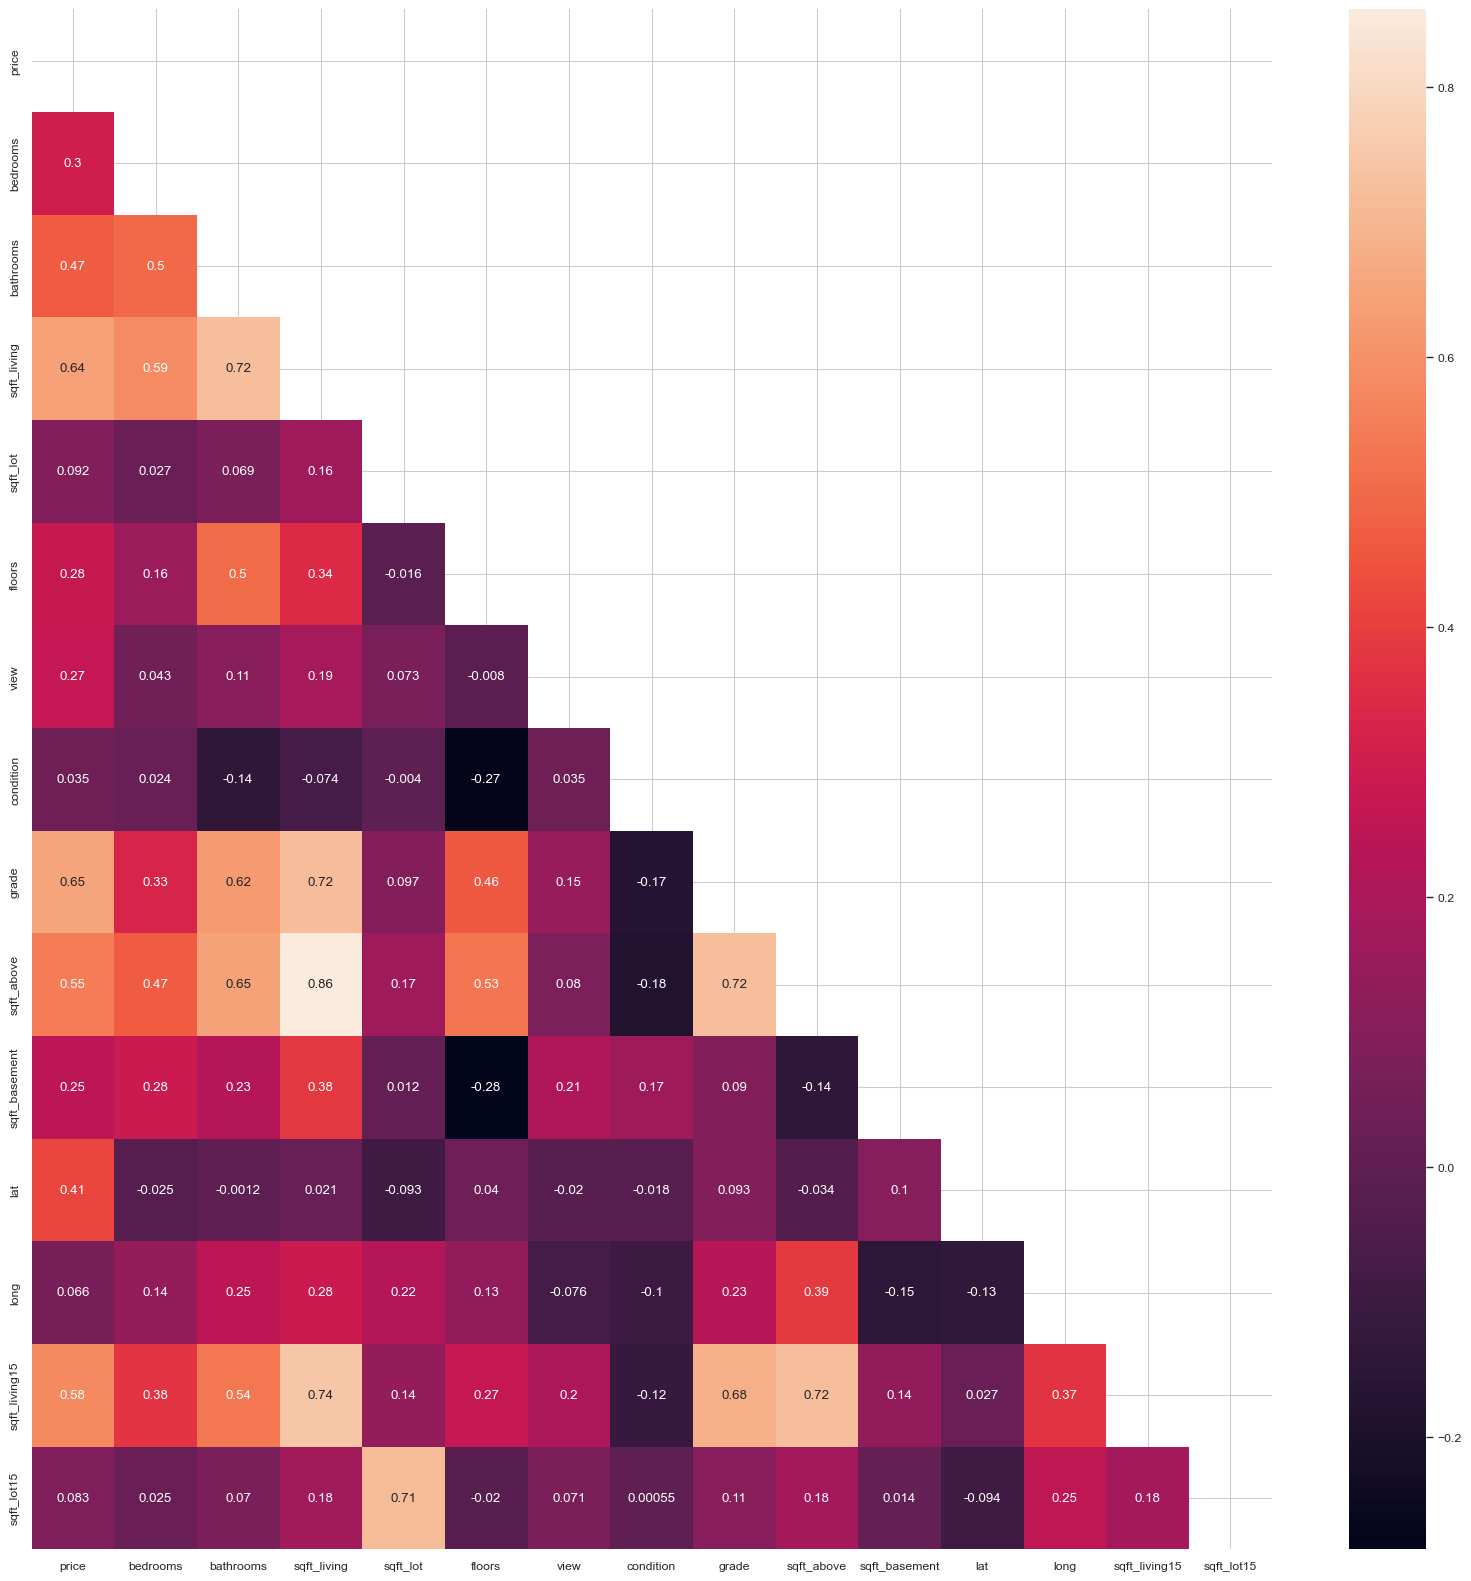

In [156]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming d_kc_house is your DataFrame
variables_numericas = d_kc_house.select_dtypes(include=['float64', 'int64']).columns

# Plot the correlation heatmap showing only the lower triangle
plt.figure(figsize=(20, 20))
mask = np.triu(np.ones_like(d_kc_house[variables_numericas].corr(), dtype=bool))
sns.heatmap(d_kc_house[variables_numericas].corr(), annot=True, mask=mask)
plt.show()


- Al hacer esta grafica es hacer un comienzo de partida en los datos. Queremos encontrar una relación entre las variables para la variable price. Notamos unos hechos importantes.


Aquí, observo inicialmente una correlación significativa entre "sqft_living" y otras variables como "sqft_living15", "sqft_above" y "grade". Por lo tanto, optaremos por utilizar únicamente "sqft_living" y eliminaremos las otras variables mencionadas.(Para el modelo de baja colinealidad)

Además, al considerar la predicción del precio, identifico una relación interesante entre las variables "sqft_living", "lat" y "bathrooms". Estas variables parecen ser importantes para modelar y predecir el precio de manera efectiva.

# Variables Categoricas

In [157]:
#convert to categorical
d_kc_house['waterfront']=d_kc_house['waterfront'].astype('category')
d_kc_house['view']=d_kc_house['view'].astype('category')
d_kc_house['condition']=d_kc_house['condition'].astype('category')
d_kc_house['grade']=d_kc_house['grade'].astype('category')
d_kc_house['yr_built']=d_kc_house['yr_built'].astype('category')
d_kc_house['yr_renovated_B']=d_kc_house['yr_renovated_B'].astype('category')

#Categorical Values

C:\Users\David\AppData\Local\Temp\ipykernel_28680\2357362911.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d_kc_house['waterfront']=d_kc_house['waterfront'].astype('category')
C:\Users\David\AppData\Local\Temp\ipykernel_28680\2357362911.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d_kc_house['view']=d_kc_house['view'].astype('category')
C:\Users\David\AppData\Local\Temp\ipykernel_28680\2357362911.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
T

 <b> Punto 2 Regresión lineal simple y multiple (10%) </b>
- </b> Construya 3 modelo de regresión lineal simeple que le permita explicar el precio de la casa argumente como selecciono las variables en sus modelos. (1.25%)
- </b> Construya un modelo que le permita explicar el precio de la casa en funcion de variables categoricas y continuas. (2.5%)
- </b> Valide el cumplimiento de los supuestos de homoscedasticidad y linealidad de las variables al 1%. (1.25%)

## Modelo 1

In [158]:
#do the linear model with categorical variables
import statsmodels.api as sm
from statsmodels.formula.api import ols


model = ols('price ~ bathrooms + sqft_living', data=d_kc_house).fit()
model.summary()



<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.409
Model:                            OLS   Adj. R-squared:                  0.409
Method:                 Least Squares   F-statistic:                     7191.
Date:                Sat, 02 Dec 2023   Prob (F-statistic):               0.00
Time:                        16:50:34   Log-Likelihood:            -2.7973e+05
No. Observations:               20756   AIC:                         5.595e+05
Df Residuals:                   20753   BIC:                         5.595e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    1.251e+05   3716.761     33.666      0.000    1.18e+05    1.32e+05
bathrooms    4289.0532   2413.587      1.777      0.076    -441.766    9019.873
sqft_living   177.0362      2.172     81.491      0.000     172.778     181.294
==============================================================================
Omnibus:                     1610.714   Durbin-Watson:                   1.967
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2126.915
Skew:                           0.681   Prob(JB):                         0.00
Kurtosis:                       3.776   Cond. No.                     7.14e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.14e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Para el primer modelo, nos enfocamos en explorar la matriz de correlaciones y seleccionar variables que tengan un peso significativo y que no estén fuertemente correlacionadas entre sí. En este caso, hemos optado por utilizar las variables "bathrooms", que indica la cantidad de cuartos, y "sqft_living", que cuantifica el espacio de la casa.

Observamos que ambas variables son significativas, ya que utilizando solo estas dos, logramos explicar el 40 por ciento de la variabilidad en los datos. Sin embargo, es importante destacar que este modelo produce resultados bastante modestos y no justificaría la verificación exhaustiva de los supuestos de linealidad.

## Modelo 2

In [170]:

model = ols('price ~ sqft_living + waterfront + view + condition + grade + lat + long + yr_built + yr_renovated_B + bathrooms', data=d_kc_house).fit()
print(model.summary())



                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.694
Model:                            OLS   Adj. R-squared:                  0.694
Method:                 Least Squares   F-statistic:                     1880.
Date:                Sat, 02 Dec 2023   Prob (F-statistic):               0.00
Time:                        17:16:25   Log-Likelihood:            -2.7291e+05
No. Observations:               20756   AIC:                         5.459e+05
Df Residuals:                   20730   BIC:                         5.461e+05
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept              -2.74e+

El r2 mejora mucho en nuestro modelo, tenemos u r2 de 0.69 en comparación con el de 0.40 que teniamos anteriormente, sin embargo aqui utilizamos muchas variables y para interpretar. Vamos a ver las primeras 3 variables mas importantes y qué significan en este modelo, aqui tambien vemos el log likelihood bajo pero mejor que en nuestro primer modelo.

In [171]:
summary = pd.DataFrame({'coef': model.params, 'std_err': model.bse, 't_values': model.tvalues, 'p_values': model.pvalues})
print(summary)

                               coef        std_err   t_values       p_values
Intercept             -2.739959e+07  870327.165792 -31.481941  1.523060e-212
waterfront[T.NS]      -1.534854e+05   17941.397625  -8.554817   1.261347e-17
view[T.1.0]            8.903085e+04    7459.651420  11.934988   9.955897e-33
view[T.2.0]            7.426514e+04    4445.362338  16.706206   3.016887e-62
view[T.3.0]            1.070122e+05    6514.020680  16.427977   2.900014e-60
view[T.4.0]            1.835499e+05   10703.397681  17.148753   1.817222e-65
condition[T.2]         3.103732e+04   25442.651908   1.219893   2.225192e-01
condition[T.3]         4.171713e+04   23704.812573   1.759859   7.844644e-02
condition[T.4]         8.088704e+04   23720.501833   3.410005   6.508534e-04
condition[T.5]         1.150839e+05   23860.239614   4.823249   1.422409e-06
grade[T.4]            -1.628533e+05  126615.727927  -1.286201   1.983872e-01
grade[T.5]            -1.655743e+05  124580.785215  -1.329052   1.838455e-01

En este caso específico, el coeficiente es de aproximadamente 93 Esto significa que, según este modelo, se espera que por cada aumento de un pie cuadrado en el área habitable de la vivienda ("sqft_living"), el precio de la vivienda aumente en alrededor de 93.6593.65 unidades de la moneda que estás utilizando (por ejemplo, dólares).

Específicamente, por cada baño adicional en una casa, el modelo predice un aumento promedio de 1.272590×1041.272590×104 unidades en el precio. Esto sugiere que, en promedio, una casa con más baños tiende a tener un precio predicho más alto según el modelo.

Es importante tener en cuenta que la magnitud del coeficiente por sí sola no proporciona información sobre la dirección de la relación (positiva o negativa) entre la variable independiente ("bathrooms") y la variable dependiente (precio). En este caso, dado que el coeficiente es positivo, indica una relación positiva, lo que sugiere que un aumento en el número de baños se asocia con un aumento en el precio predicho.

### Análisis de residuos

c:\Users\David\anaconda3\envs\Machine_Learning\Lib\site-packages\statsmodels\graphics\regressionplots.py:430: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  fig = abline_plot(0, fitted_line.params[0], color='k', ax=ax)
c:\Users\David\anaconda3\envs\Machine_Learning\Lib\site-packages\statsmodels\graphics\regressionplots.py:430: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  fig = abline_plot(0, fitted_line.params[0], color='k', ax=ax)
c:\Users\David\anaconda3\envs\Machine_Learning\Lib\site-packages\statsmodels\graphics\regressionplots.py:430: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In

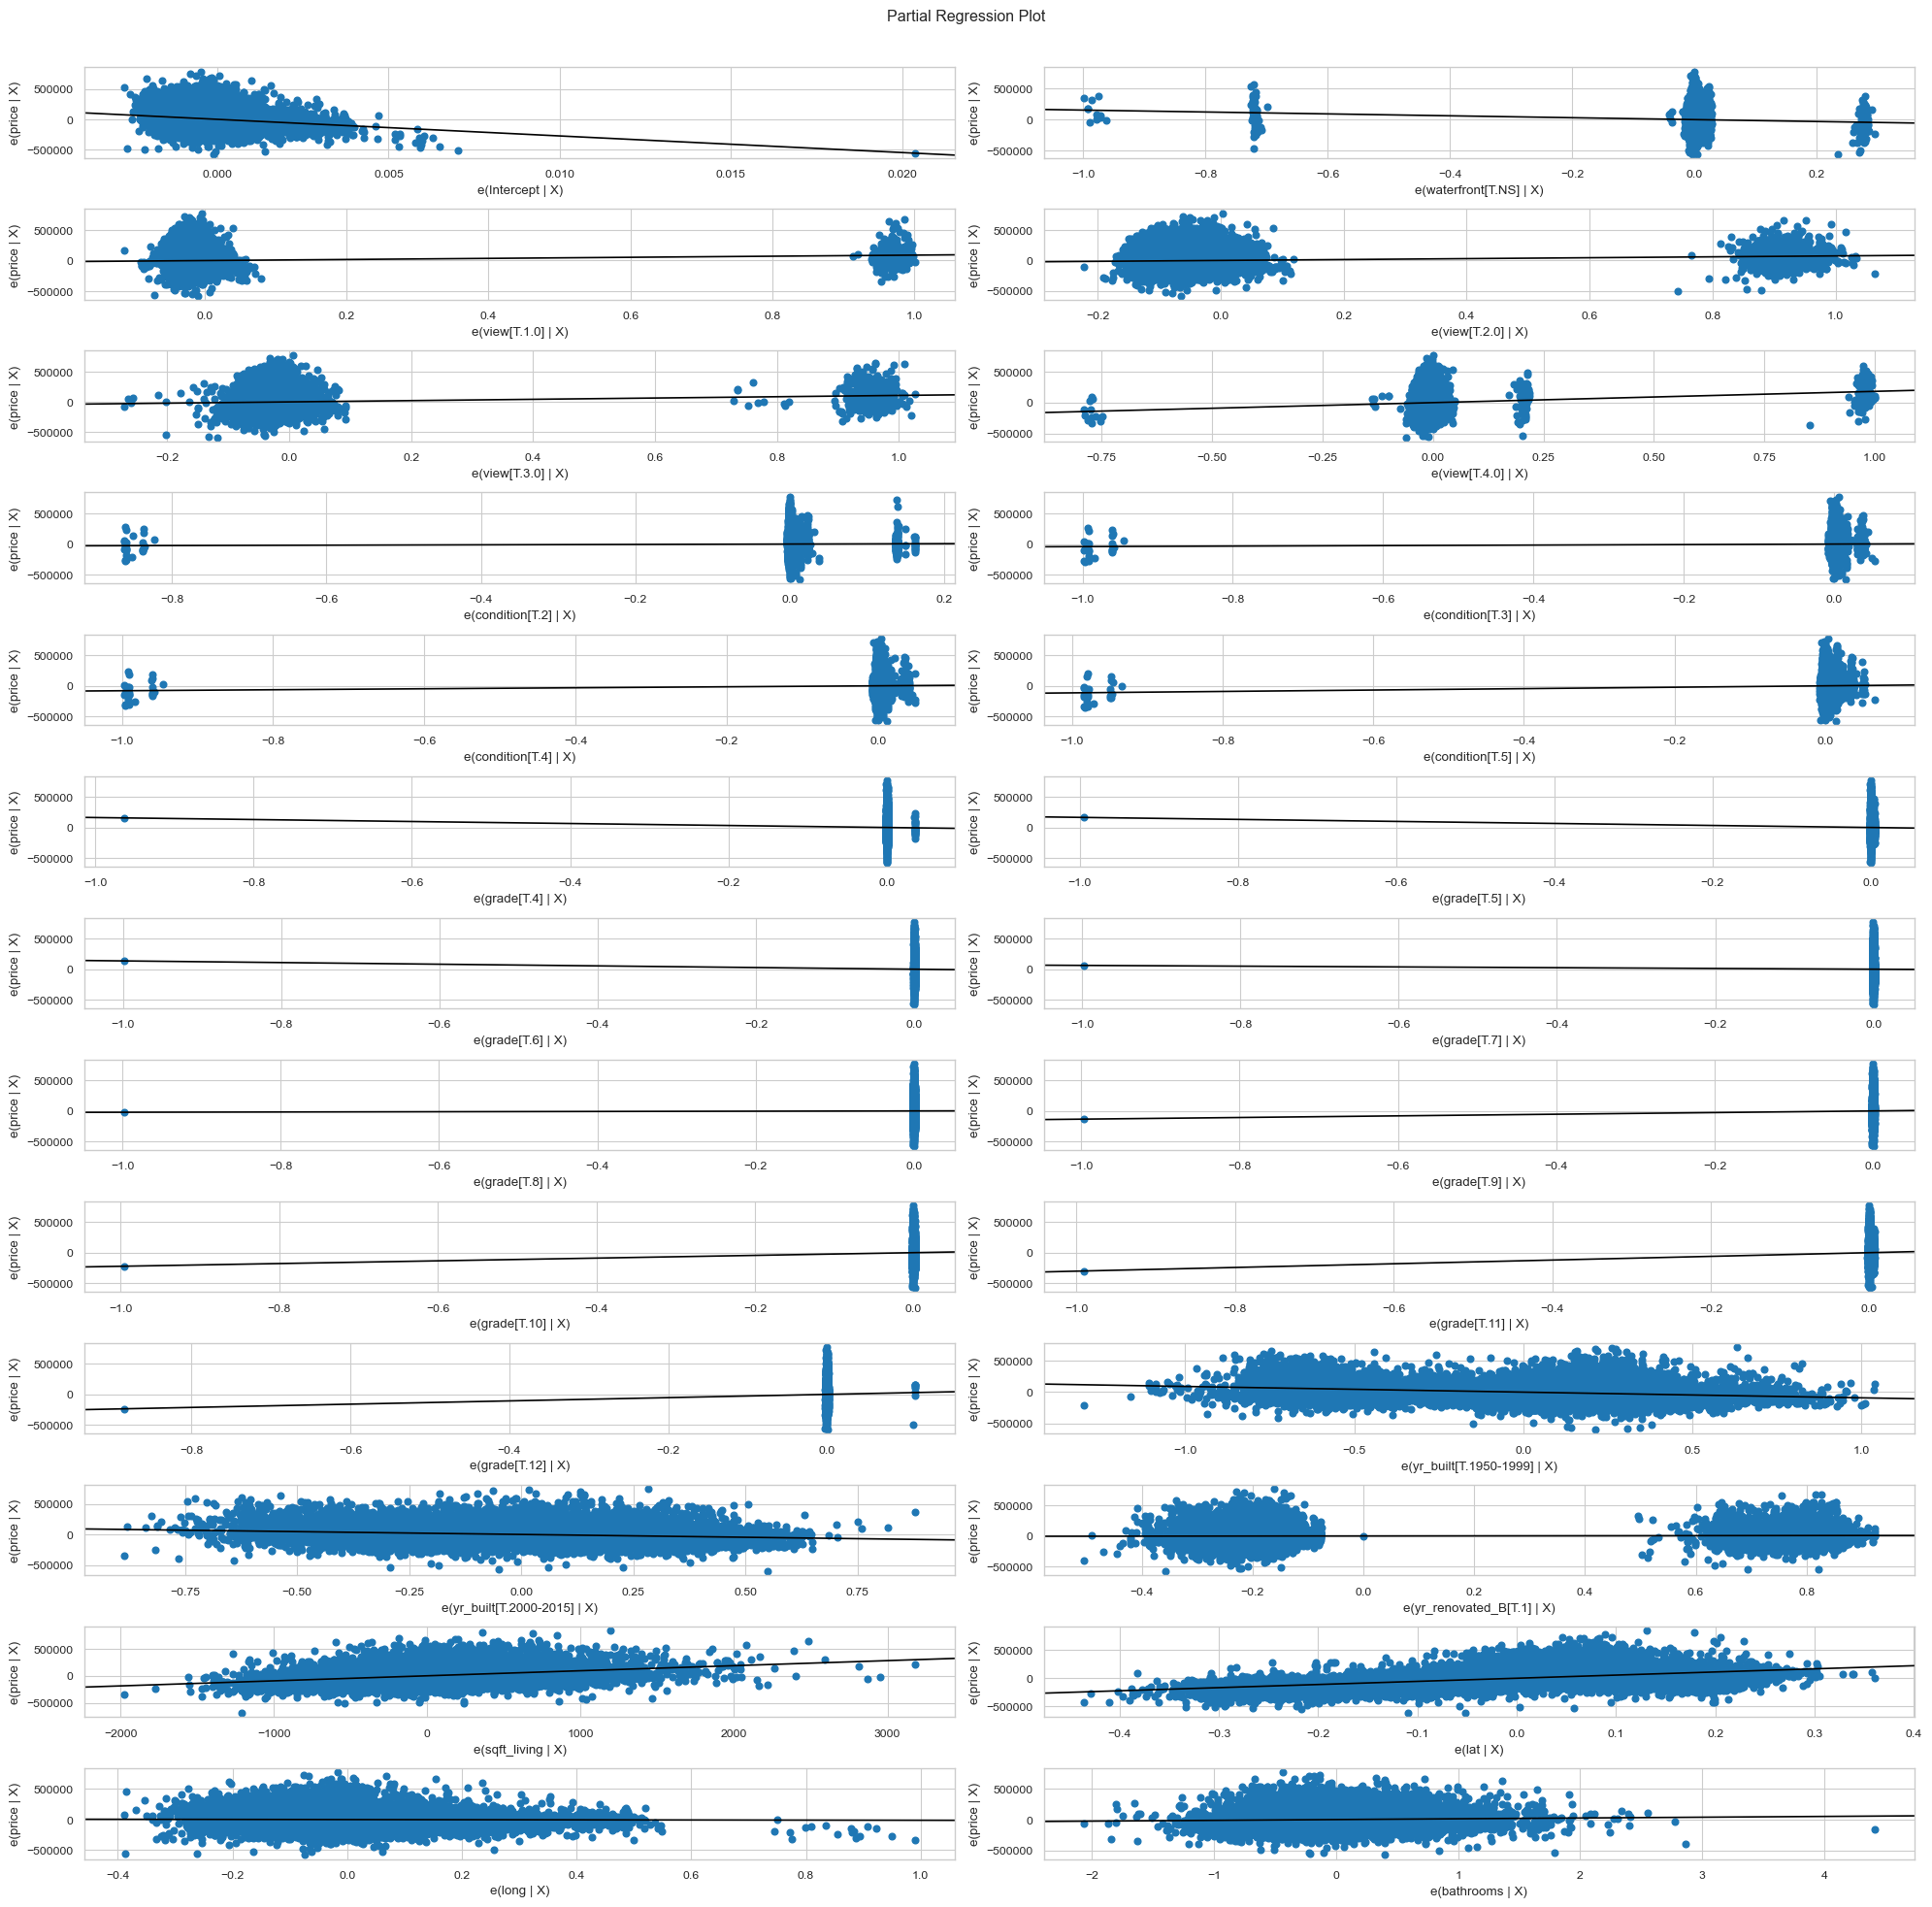

In [172]:
#how to plot all the sumaary of the model
import statsmodels.api as sm
from statsmodels.formula.api import ols

model = ols('price ~ sqft_living + waterfront + view + condition + grade + lat + long + yr_built + yr_renovated_B + bathrooms', data=d_kc_house).fit()

fig = plt.figure(figsize=(20,20))
fig = sm.graphics.plot_partregress_grid(model, fig=fig)
plt.show()


Aqui hcacemos una regresion lineal con cada variable independiente y vemos como muchnas de ellas siguien unos residuos heteroscedasticos individualmente, Para esto vamos a ver los residuos del modelo y la grafica de qq plot

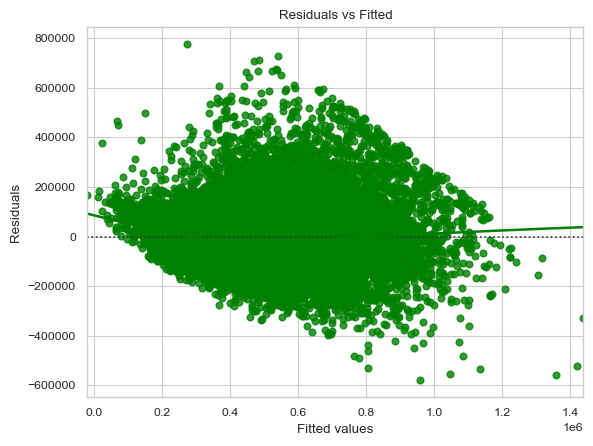

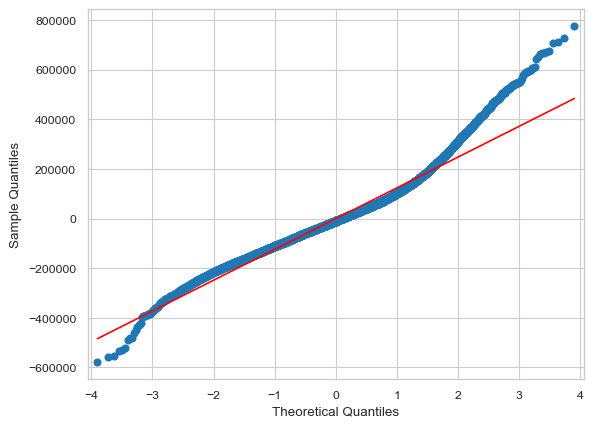

In [174]:
#do the residual plot
sns.set_style('whitegrid')
sns.residplot(x=model.fittedvalues, y=model.resid, lowess=True, color="g")
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted')
plt.show()


sm.qqplot(model.resid, line='s')
plt.show()




- Vemos que nuestros datos vemos que tiene una no heteroscedasticidad o vemos una varianza cosntante, para esto vamos a hacer la transformación logaritmica para la estabilización de la varianza y ver como el modelo 3 funciona.

## Modelo 3

In [177]:

model = ols('np.log(price) ~ sqft_living + waterfront + view + condition + grade + lat + yr_built + yr_renovated_B + bathrooms', data=d_kc_house).fit()
print(model.summary())



                            OLS Regression Results                            
Dep. Variable:          np.log(price)   R-squared:                       0.713
Model:                            OLS   Adj. R-squared:                  0.713
Method:                 Least Squares   F-statistic:                     2150.
Date:                Sat, 02 Dec 2023   Prob (F-statistic):               0.00
Time:                        17:40:43   Log-Likelihood:                -325.43
No. Observations:               20756   AIC:                             700.9
Df Residuals:                   20731   BIC:                             899.4
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept               -51.16

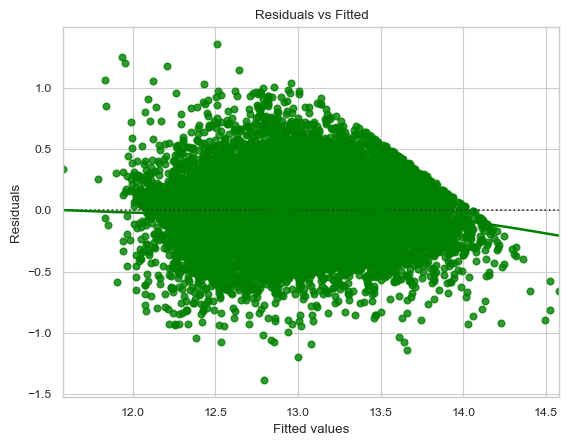

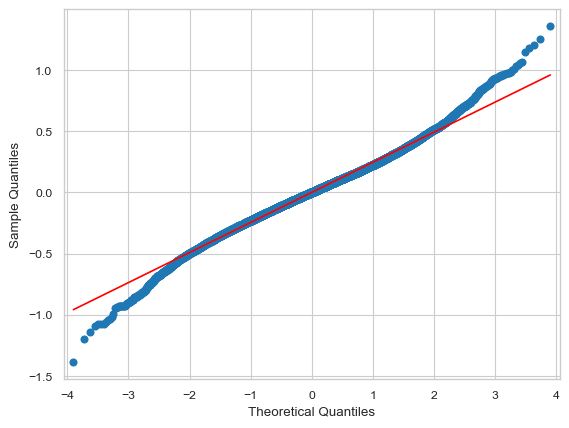

In [176]:
sns.set_style('whitegrid')
sns.residplot(x=model.fittedvalues, y=model.resid, lowess=True, color="g")
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted')
plt.show()


sm.qqplot(model.resid, line='s')
plt.show()

La transformación mejora la gráfica sin embargo aunque es una mejor aprximación, los residuos siguen teniendo heteroscedasticidad. 

## Pruebas de normalidad y heteroscedasticidad

C:\Users\David\AppData\Local\Temp\ipykernel_28680\3588273518.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(model.resid)


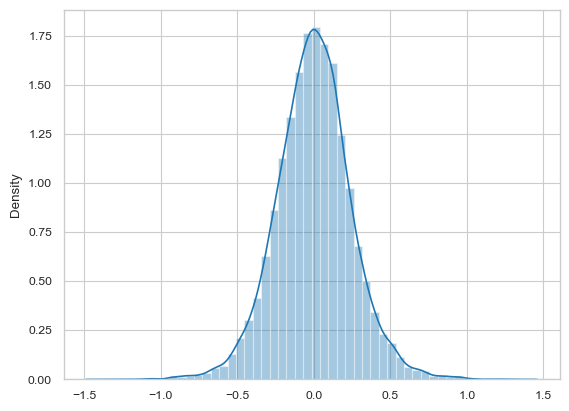

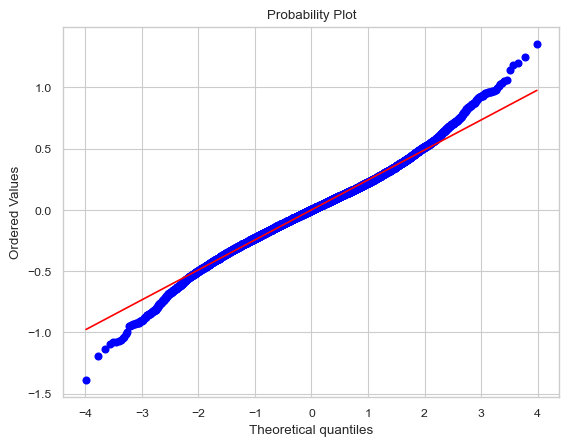

In [178]:
#plor the histogram of the residuals
sns.distplot(model.resid)
plt.show()

#qqplot of the residuals
import scipy.stats as stats
import pylab
stats.probplot(model.resid, dist="norm", plot=pylab)
pylab.show()


In [181]:
#kolmogorov-smirnov test
from scipy.stats import kstest
stat, p = kstest(model.resid, 'norm')
print('Statistics=%.3f, p=%.3f' % (stat, p))

import statsmodels.stats.api as sms
residuals = model.resid

# Extract the exogenous variables
exog_vars = model.model.exog

# Perform the Breusch-Pagan test
bp_test = sms.het_breuschpagan(residuals, exog_vars)

# Display the test results
print("Breusch-Pagan Test Results:")
print(f"LM Statistic: {bp_test[0]}")
print(f"P-value: {bp_test[1]}")
print(f"F-statistic: {bp_test[2]}")
print(f"F p-value: {bp_test[3]}")
    

Statistics=0.297, p=0.000
Breusch-Pagan Test Results:
LM Statistic: 1030.748105265784
P-value: 2.6147866678195817e-202
F-statistic: 45.137655453653586
F p-value: 8.745554446537275e-208


Con base en las pruebas de normalidad, observamos que el valor p de 0.00 nos permite rechazar la hipótesis nula de que los datos sigan una distribución normal. Además, la prueba de Breusch-Pagan indica que hay una fuerte evidencia, con un nivel de confianza del 95%, de que los datos no son homocedásticos.

Esto implica que los residuos no son homogéneos, lo cual sugiere que el modelo no cumple con algunos de los requisitos asociados a la linealidad. La heterocedasticidad en los residuos puede afectar la validez de las inferencias y predicciones del modelo de regresión lineal, ya que la variabilidad de los errores no es constante a lo largo de los valores predichos.

 <b> Punto 3 Regresión Regularizada (10%)</b>

- </b>Realice la clusterización (utilice entre 5 y 10 clusters) de las observaciones usando las variables que crea convenientes ***agumente porque eligio esas variables***.(5%)
- </b>Aplique la regresión de Lasso y Ridge

Seleccion de Clusterización

In [182]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score


sil_scores = []
kmax = 10

for k in range(2, kmax+1):
    kmeans = KMeans(n_clusters = k).fit(d_kc_house[['lat','long']])
    labels = kmeans.labels_
    sil_scores.append(silhouette_score(d_kc_house[['lat','long']], labels, metric = 'euclidean'))

optimal_clusters = sil_scores.index(max(sil_scores)) + 2
optimal_silhouette_score = max(sil_scores)
kmeans = KMeans(n_clusters=optimal_clusters, n_init=10, random_state=42)
kmeans.fit(d_kc_house[['lat','long']])

kmeans.predict(d_kc_house[['lat','long']])
d_kc_house['Cluster'] = kmeans.predict(d_kc_house[['lat','long']])

c:\Users\David\anaconda3\envs\Machine_Learning\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\David\anaconda3\envs\Machine_Learning\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\David\anaconda3\envs\Machine_Learning\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\David\anaconda3\envs\Machine_Learning\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarni

   Cluster          price
0        0  475461.330097
1        1  423197.426072
2        2  561522.978085
3        3  289804.935764
4        4  589110.393396
5        5  353771.049008
6        6  488791.469583
7        7  617170.418903


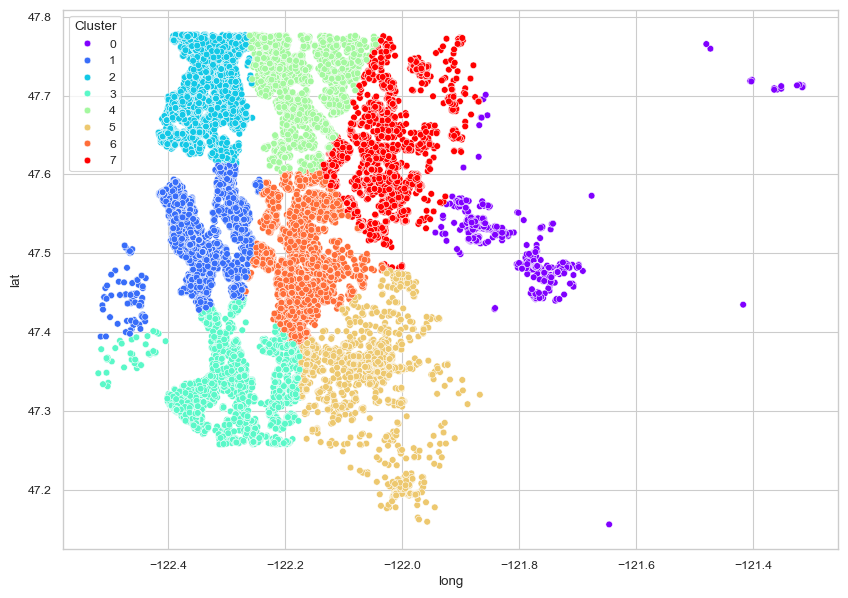

In [183]:
cluster_price_mean = d_kc_house.groupby('Cluster')['price'].mean().reset_index()

# Scatter plot with cluster assignment color-coding and marker size based on mean price
plt.figure(figsize=(10, 7))
scatter_plot = sns.scatterplot(x='long', y='lat', data=d_kc_house, hue='Cluster', palette='rainbow', legend='full')

print(cluster_price_mean)

- La utilización de la latitud y longitud es valiosa para predecir ciertos vecindarios que podrían tener una influencia significativa en el precio de las casas. Al incorporar la información de ubicación, podemos categorizar de manera más precisa las ecuaciones y buscar un mejor ajuste en los residuos o errores del modelo


- Vamos a utilizar 8 clusters, lo que vemos en los datos es que los cluster de abajo, tienen un precio menor y hacie arriba se be que las casas son un poco mas caras, para representar esta información vamos a quedarnos con 8 clusters.

## Regresion Lasso y Ridge

In [187]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LassoCV, RidgeCV
from sklearn.pipeline import Pipeline
import pandas as pd

# Extracting target variable and features
y = (d_kc_house['price'])

# Selecting specific variables for X
categorical_columns = ['waterfront', 'view', 'condition', 'grade', 'yr_built', 'bathrooms', 'Cluster']
X = d_kc_house[['sqft_living'] + categorical_columns]

# Convert selected columns to 'category'
X[categorical_columns] = X[categorical_columns].astype('category')

# One-hot encode categorical variables
X_encoded = pd.get_dummies(X, columns=categorical_columns, drop_first=True)

# Create the column transformer with standardization
preprocessor = StandardScaler()

# Define the pipeline for Lasso model with preprocessing and classifier
lasso_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LassoCV(alphas=np.logspace(-6, 6, 20), cv=10, random_state=42))
])

ridge_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RidgeCV(alphas=np.logspace(-6, 6, 20), cv=10))
])


# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Train the Lasso model with the pipeline
lasso_pipeline.fit(X_train, y_train)
ridge_pipeline.fit(X_train, y_train)

# Evaluate the Lasso model
lasso_score_train = lasso_pipeline.score(X_train, y_train)
lasso_score_test = lasso_pipeline.score(X_test, y_test)
ridge_score_train = ridge_pipeline.score(X_train, y_train)
ridge_score_test = ridge_pipeline.score(X_test, y_test)


# Get the selected alpha parameter for the Lasso model
lasso_alpha = lasso_pipeline.named_steps['classifier'].alpha_
ridge_alpha = ridge_pipeline.named_steps['classifier'].alpha_

print("Lasso Model Summary:")
print(f"Selected Alpha: {lasso_alpha}")
print(f"Training Score: {lasso_score_train}")
print(f"Testing Score: {lasso_score_test}")

print("Ridge Model Summary:")
print(f"Selected Alpha: {ridge_alpha}")
print(f"Training Score: {ridge_score_train}")
print(f"Testing Score: {ridge_score_test}")


C:\Users\David\AppData\Local\Temp\ipykernel_28680\408773185.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[categorical_columns] = X[categorical_columns].astype('category')
c:\Users\David\anaconda3\envs\Machine_Learning\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:614: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 502082015797.0625, tolerance: 74502629677.60841
  model = cd_fast.enet_coordinate_descent_gram(
c:\Users\David\anaconda3\envs\Machine_Learning\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:614: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 71563244570774.08, toler

Lasso Model Summary:
Selected Alpha: 1e-06
Training Score: 0.7099993090210759
Testing Score: 0.705661018698079
Ridge Model Summary:
Selected Alpha: 1e-06
Training Score: 0.7100330222046213
Testing Score: 0.7056570374898252


Vemos que nuestro modelo Lasso tiene un r2 un poco más alto que el de ridge, sin embargo los dos parecen estan dando un resultado constante. 

## Coeficientes más importantes


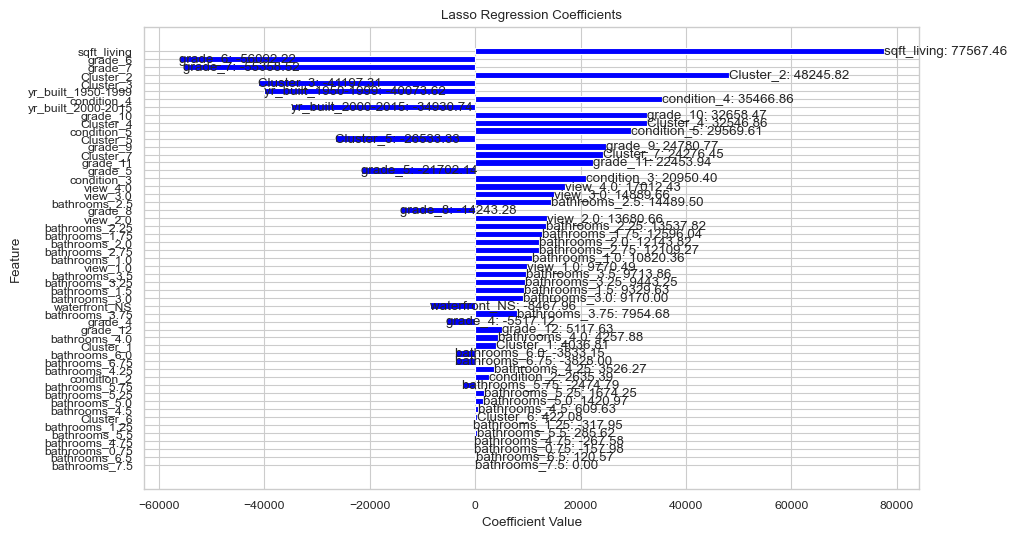

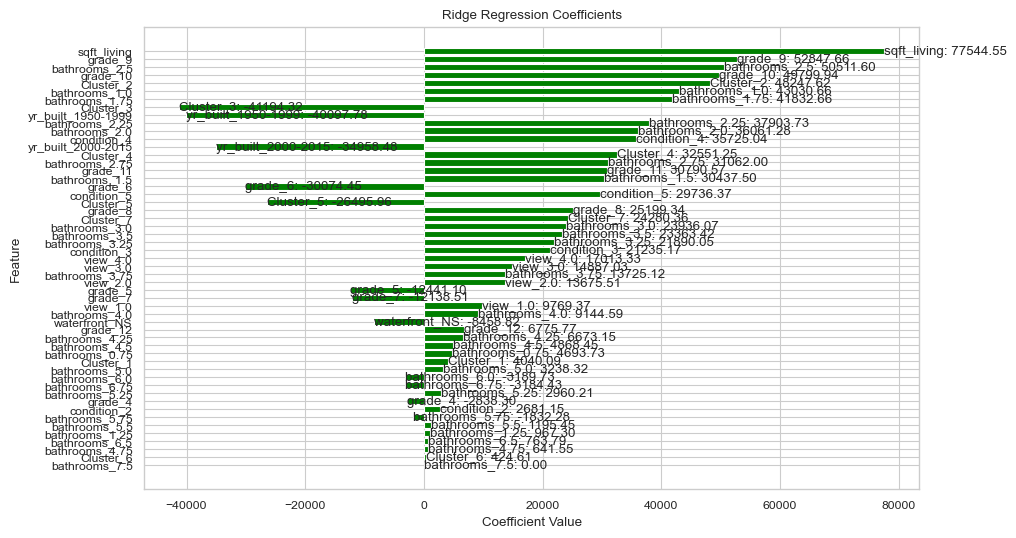

Top 3 Lasso Coefficients:
        Feature   Coefficient
0   sqft_living  77567.464205
47    Cluster_2  48245.819924
8   condition_4  35466.864927

Top 3 Ridge Coefficients:
          Feature   Coefficient
0     sqft_living  77544.549149
15        grade_9  52847.663988
28  bathrooms_2.5  50511.600608


In [188]:
# Get the coefficients from the Lasso model
lasso_coefs = lasso_pipeline.named_steps['classifier'].coef_

# Get the coefficients from the Ridge model
ridge_coefs = ridge_pipeline.named_steps['classifier'].coef_

# Combine coefficients and feature names into a DataFrame
lasso_coef_df = pd.DataFrame({'Feature': X_encoded.columns, 'Coefficient': lasso_coefs})
ridge_coef_df = pd.DataFrame({'Feature': X_encoded.columns, 'Coefficient': ridge_coefs})

# Plot the coefficients for Lasso
plt.figure(figsize=(10, 6))
lasso_coef_df.sort_values(by='Coefficient', key=abs, inplace=True)
plt.barh(lasso_coef_df['Feature'], lasso_coef_df['Coefficient'], color='blue')
plt.title('Lasso Regression Coefficients')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')

# Add feature names to the plot
for i, coef in enumerate(lasso_coef_df['Coefficient']):
    plt.text(coef, i, f'{lasso_coef_df["Feature"].iloc[i]}: {coef:.2f}', ha='left', va='center')

plt.show()

# Plot the coefficients for Ridge
plt.figure(figsize=(10, 6))
ridge_coef_df.sort_values(by='Coefficient', key=abs, inplace=True)
plt.barh(ridge_coef_df['Feature'], ridge_coef_df['Coefficient'], color='green')
plt.title('Ridge Regression Coefficients')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')

# Add feature names to the plot
for i, coef in enumerate(ridge_coef_df['Coefficient']):
    plt.text(coef, i, f'{ridge_coef_df["Feature"].iloc[i]}: {coef:.2f}', ha='left', va='center')

plt.show()

# Identify the top 3 coefficients for Lasso
lasso_top3 = lasso_coef_df.nlargest(3, 'Coefficient', 'all')
print("Top 3 Lasso Coefficients:")
print(lasso_top3)

# Identify the top 3 coefficients for Ridge
ridge_top3 = ridge_coef_df.nlargest(3, 'Coefficient', 'all')
print("\nTop 3 Ridge Coefficients:")
print(ridge_top3)

### top 3 Coeficientes para Lasso:

    - sqft_living (Superficie habitable): Un aumento de una unidad en la superficie habitable resulta en un aumento de aproximadamente $77,567 en el precio de la casa, según el modelo Lasso.
    - Cluster_2: Pertenecer al segundo cluster tiene un impacto positivo en el precio, con un aumento de aproximadamente $48,245 en comparación con otras categorías de cluster.(En nuestro caso el cluster 2 significa las casas más caras ubicadas en la parte superior de la ciudad)
    - condition_4 (Condición 4): Tener una condición de 4 (posiblemente en una escala de condición) agrega aproximadamente $35,467 al precio en comparación con otras condiciones.

### Top 3 Coeficientes para Ridge:

    - sqft_living (Superficie habitable): Similar al modelo Lasso, un aumento de una unidad en la superficie habitable resulta en un aumento de aproximadamente $77,544 en el precio de la casa, según el modelo Ridge.

    - grade_9: Tener una calificación de 9 (posiblemente en una escala de grado) agrega aproximadamente $52,848 al precio en comparación con otras calificaciones.

    - bathrooms_2.5 (Baños 2.5): Tener 2.5 baños agrega aproximadamente $50,511 al precio en comparación con otras cantidades de baños.

## Análisis de los residuales 


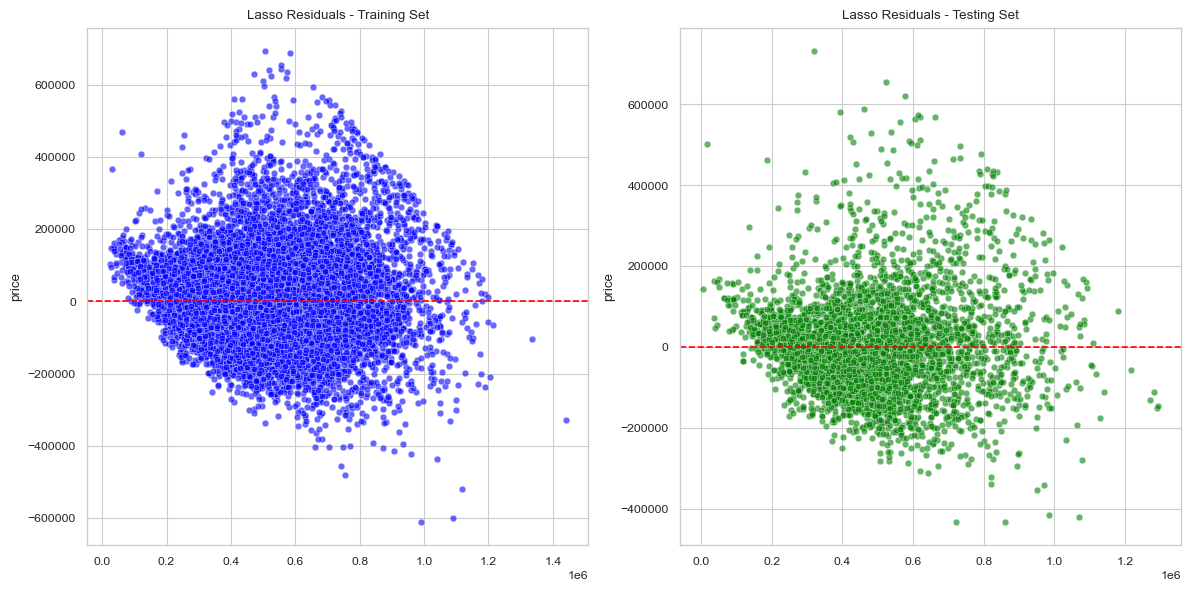

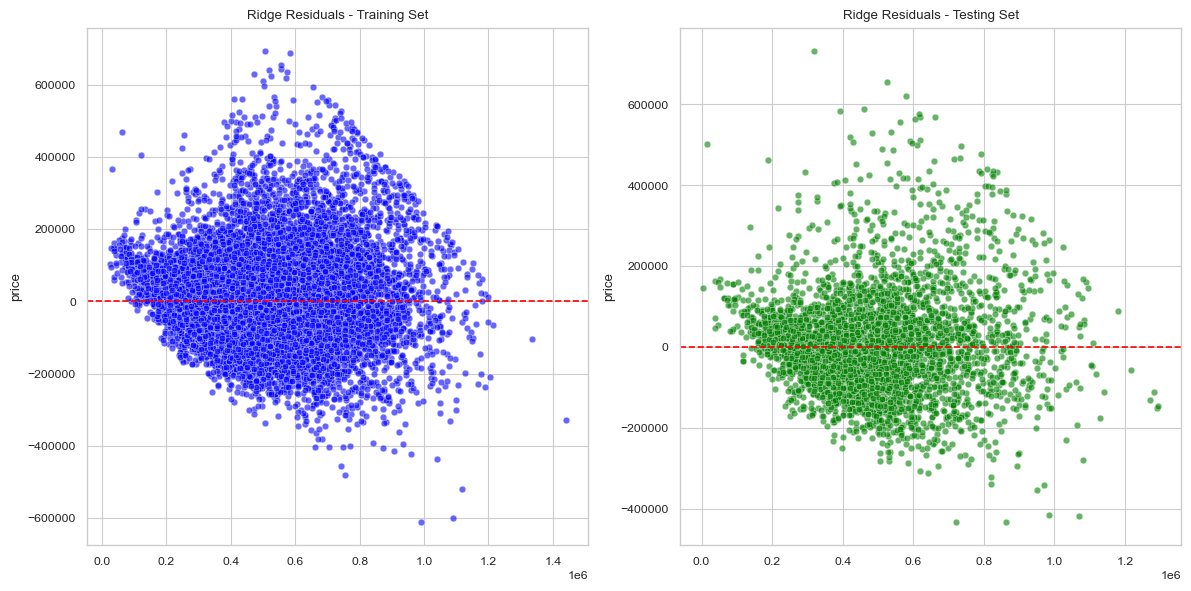

In [189]:
import matplotlib.pyplot as plt
import seaborn as sns

# Get the predicted values
lasso_pred_train = lasso_pipeline.predict(X_train)
lasso_pred_test = lasso_pipeline.predict(X_test)

ridge_pred_train = ridge_pipeline.predict(X_train)
ridge_pred_test = ridge_pipeline.predict(X_test)

# Calculate residuals
lasso_residuals_train = y_train - lasso_pred_train
lasso_residuals_test = y_test - lasso_pred_test

ridge_residuals_train = y_train - ridge_pred_train
ridge_residuals_test = y_test - ridge_pred_test

# Plotting residuals
plt.figure(figsize=(12, 6))

# Lasso Residuals
plt.subplot(1, 2, 1)
sns.scatterplot(x=lasso_pred_train, y=lasso_residuals_train, color='blue', alpha=0.6)
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Lasso Residuals - Training Set')

plt.subplot(1, 2, 2)
sns.scatterplot(x=lasso_pred_test, y=lasso_residuals_test, color='green', alpha=0.6)
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Lasso Residuals - Testing Set')

plt.tight_layout()
plt.show()

# Ridge Residuals
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.scatterplot(x=ridge_pred_train, y=ridge_residuals_train, color='blue', alpha=0.6)
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Ridge Residuals - Training Set')

plt.subplot(1, 2, 2)
sns.scatterplot(x=ridge_pred_test, y=ridge_residuals_test, color='green', alpha=0.6)
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Ridge Residuals - Testing Set')

plt.tight_layout()
plt.show()


- Hicimos la tranformación Logaritmica de la variable respuesta y en los datos pero solo mejora 0.01 en el score por lo que en este caso dejamos mejor la ecuación más pequenña para la interpretación de los datos. Sin embargo, con los modelos ridge y lasso vemos que los residuales no son muy buenos, sin embargo estos mejoran en el test. 

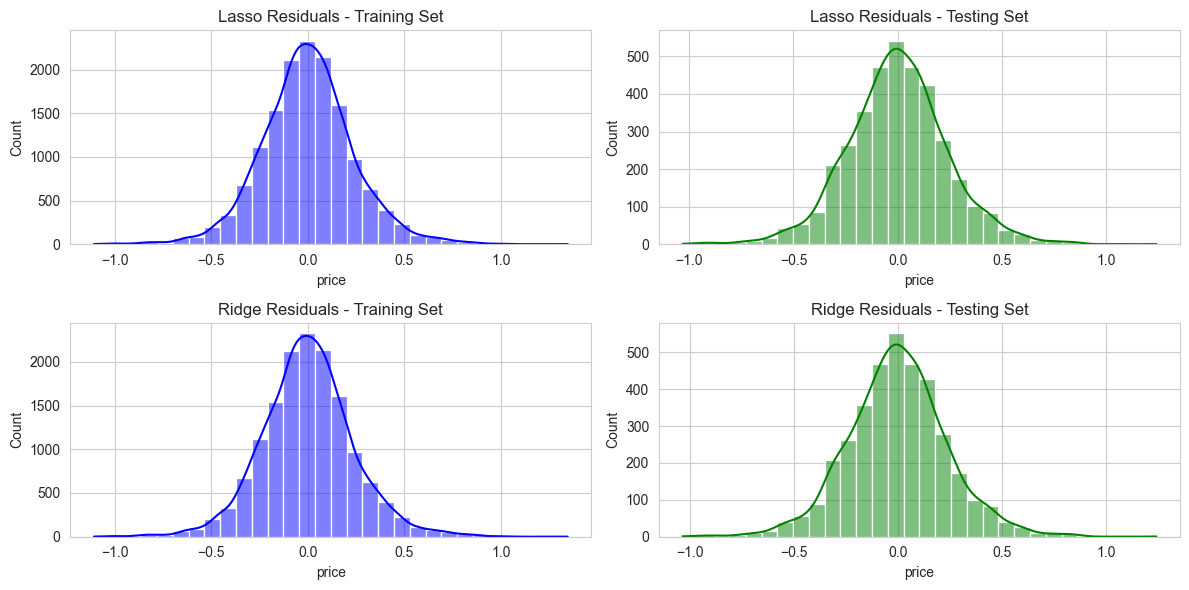

c:\Users\David\anaconda3\envs\Machine_Learning\Lib\site-packages\statsmodels\graphics\gofplots.py:1045: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


<Figure size 1200x600 with 0 Axes>

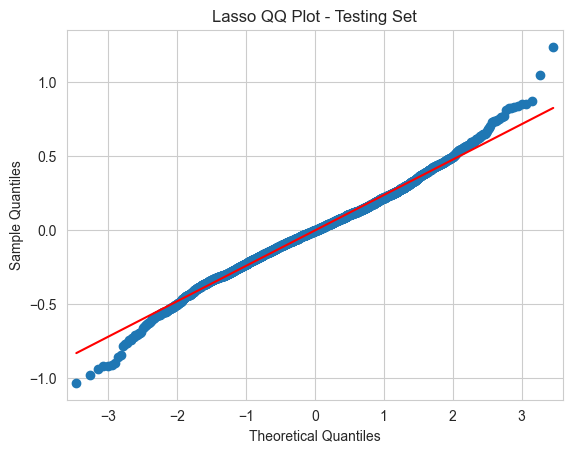

<Figure size 1200x600 with 0 Axes>

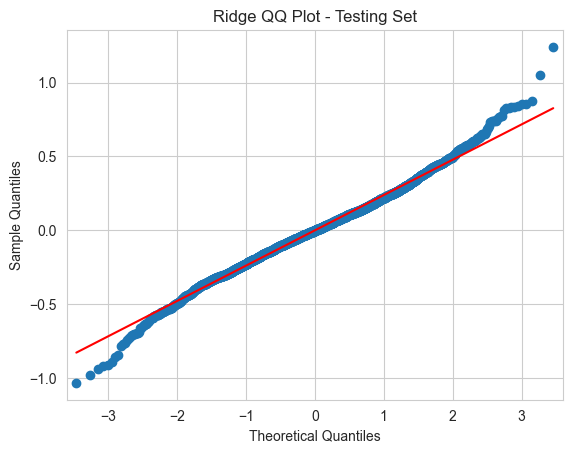

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from statsmodels.graphics.gofplots import qqplot

# Calculate residuals
lasso_residuals_train = y_train - lasso_pred_train
lasso_residuals_test = y_test - lasso_pred_test

ridge_residuals_train = y_train - ridge_pred_train
ridge_residuals_test = y_test - ridge_pred_test

# Plotting histograms
plt.figure(figsize=(12, 6))

# Lasso Residuals
plt.subplot(2, 2, 1)
sns.histplot(lasso_residuals_train, bins=30, kde=True, color='blue')
plt.title('Lasso Residuals - Training Set')

plt.subplot(2, 2, 2)
sns.histplot(lasso_residuals_test, bins=30, kde=True, color='green')
plt.title('Lasso Residuals - Testing Set')

# Ridge Residuals
plt.subplot(2, 2, 3)
sns.histplot(ridge_residuals_train, bins=30, kde=True, color='blue')
plt.title('Ridge Residuals - Training Set')

plt.subplot(2, 2, 4)
sns.histplot(ridge_residuals_test, bins=30, kde=True, color='green')
plt.title('Ridge Residuals - Testing Set')

plt.tight_layout()
plt.show()

# QQ plots
plt.figure(figsize=(12, 6))

qqplot(lasso_residuals_test, line='s', color='blue')
plt.title('Lasso QQ Plot - Testing Set')
plt.show()



plt.figure(figsize=(12, 6))
qqplot(ridge_residuals_test, line='s', color='green')
plt.title('Ridge QQ Plot - Testing Set')
plt.show()


- Nuestros residuos muestran una tendencia a seguir una distribución normal, aunque se observan algunos datos en las colas del gráfico de probabilidad cuantil (qq plot) que no se ajustan perfectamente. No obstante, en términos prácticos, estos modelos no se desvían significativamente de las suposiciones subyacentes.

### Dataset Clientes Banco
Esta base de datos es un registro de la lista de clientes de un banco, y puede ser usada para estimar la probalidad de incumplimiento de pago de las tarjetas de credito.

* **X1: LIMIT_BAL** - Amount of the   given credit (NT dollar): it includes both the individual consumer credit and   his/her family (supplementary) credit
* **X2: SEX** - Gender (1 =   male; 2 = female)
* **X3: EDUCATION** - Education (1 =   graduate school; 2 = university; 3 = high school; 4 = others)
* **X4: MARRIAGE** - Marital status   (1 = married; 2 = single; 3 = others)
* **X5: AGE** - Age (year)
* **X6: PAY_0** - History of   past payment. The repayment status in September, 2005*
* **X7: PAY_2** - History of past payment. The repayment status in August, 2005*
* **X8: PAY_3** - History of past payment. The repayment status in July, 2005*
* **X9: PAY_4** - History of past payment. The repayment status in June, 2005*
* **X10: PAY_5** - History of past payment. The repayment status in May, 2005*
* **X11: PAY_6** - History of past payment. The repayment status in April, 2005*
* **X12: BILL_AMT1** - Amount of bill   statement in September, 2005 (NT dollar)
* **X13: BILL_AMT2** - Amount of bill   statement in August, 2005 (NT dollar)
* **X14: BILL_AMT3** - Amount of bill   statement in July, 2005 (NT dollar)
* **X15: BILL_AMT4** - Amount of bill   statement in June, 2005 (NT dollar)
* **X16: BILL_AMT5** - Amount of bill   statement in May, 2005 (NT dollar)
* **X17: BILL_AMT6** - Amount of bill   statement in April, 2005 (NT dollar)
* **X18: PAY_AMT1** - Amount of   previous payment. Paid in September, 2005 (NT dollar)
* **X19: PAY_AMT2** - Amount of   previous payment. Paid in August, 2005 (NT dollar)
* **X20: PAY_AMT3** - Amount of   previous payment. Paid in July, 2005 (NT dollar)
* **X21: PAY_AMT4** - Amount of   previous payment. Paid in June, 2005 (NT dollar)
* **X22: PAY_AMT5** - Amount of   previous payment. Paid in May, 2005 (NT dollar)
* **X23: PAY_AMT6** - Amount of   previous payment. Paid in April, 2005 (NT dollar)
* **X24: Y: Default Payment Next Month** - Probability of Default. (1: Yes, 0: No)   


**Pregunta 4: Implementación y Evaluación de un Modelo de Regresión Logística (25%)**

   - **Transformación de la Variable Objetivo:** Convierta la variable objetivo en una variable binaria.
   - **Formulación del Modelo:** Cree un modelo de regresión logística con el objetivo de maximizar la explicación de la variabilidad en los datos.

   - **Interpretación de Coeficientes:** Analice e interprete los coeficientes obtenidos en el modelo de regresión logística. Considere todas las interpretaciones que sean relevantes.
   - **Evaluación del Rendimiento:** Utilice la matriz de confusión y otras métricas de rendimiento relevantes para evaluar la efectividad del modelo.

## Lectura de los datos

In [14]:
df_banco=pd.read_csv('default of credit card clients.csv',sep=';',header=1)

df_banco.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,30000.0,15000.500000,8660.398374,1.0,7500.75,15000.5,22500.25,30000.0
LIMIT_BAL,30000.0,167484.322667,129747.661567,10000.0,50000.00,140000.0,240000.00,1000000.0
SEX,30000.0,1.603733,0.489129,1.0,1.00,2.0,2.00,2.0
EDUCATION,30000.0,1.853133,0.790349,0.0,1.00,2.0,2.00,6.0
MARRIAGE,30000.0,1.551867,0.521970,0.0,1.00,2.0,2.00,3.0
AGE,30000.0,35.485500,9.217904,21.0,28.00,34.0,41.00,79.0
PAY_0,30000.0,-0.016700,1.123802,-2.0,-1.00,0.0,0.00,8.0
PAY_2,30000.0,-0.133767,1.197186,-2.0,-1.00,0.0,0.00,8.0
PAY_3,30000.0,-0.166200,1.196868,-2.0,-1.00,0.0,0.00,8.0
PAY_4,30000.0,-0.220667,1.169139,-2.0,-1.00,0.0,0.00,8.0


- Observamos que nuestros datos incluyen tanto variables categóricas como numéricas. Aquí proporcionamos algunos descriptivos generales; sin embargo, nos enfocaremos específicamente en la variable 'age'. En relación con esta variable, observamos que la edad tiene una media de 35 años, una desviación estándar de 9 y un valor máximo de 79. En general, esta vista nos proporciona información descriptiva valiosa para entender las características de nuestra variable de interés.

## Limpieza de los datos

In [190]:
df_banco.isnull().sum()*100/df_banco.shape[0]

ID                            0.0
LIMIT_BAL                     0.0
SEX                           0.0
EDUCATION                     0.0
MARRIAGE                      0.0
AGE                           0.0
PAY_0                         0.0
PAY_2                         0.0
PAY_3                         0.0
PAY_4                         0.0
PAY_5                         0.0
PAY_6                         0.0
BILL_AMT1                     0.0
BILL_AMT2                     0.0
BILL_AMT3                     0.0
BILL_AMT4                     0.0
BILL_AMT5                     0.0
BILL_AMT6                     0.0
PAY_AMT1                      0.0
PAY_AMT2                      0.0
PAY_AMT3                      0.0
PAY_AMT4                      0.0
PAY_AMT5                      0.0
PAY_AMT6                      0.0
default payment next month    0.0
dtype: float64

No tenemos valores vacios en nuestro dataset.


In [16]:
df_banco.dtypes

ID                            int64
LIMIT_BAL                     int64
SEX                           int64
EDUCATION                     int64
MARRIAGE                      int64
AGE                           int64
PAY_0                         int64
PAY_2                         int64
PAY_3                         int64
PAY_4                         int64
PAY_5                         int64
PAY_6                         int64
BILL_AMT1                     int64
BILL_AMT2                     int64
BILL_AMT3                     int64
BILL_AMT4                     int64
BILL_AMT5                     int64
BILL_AMT6                     int64
PAY_AMT1                      int64
PAY_AMT2                      int64
PAY_AMT3                      int64
PAY_AMT4                      int64
PAY_AMT5                      int64
PAY_AMT6                      int64
default payment next month    int64
dtype: object

## Descriptivos

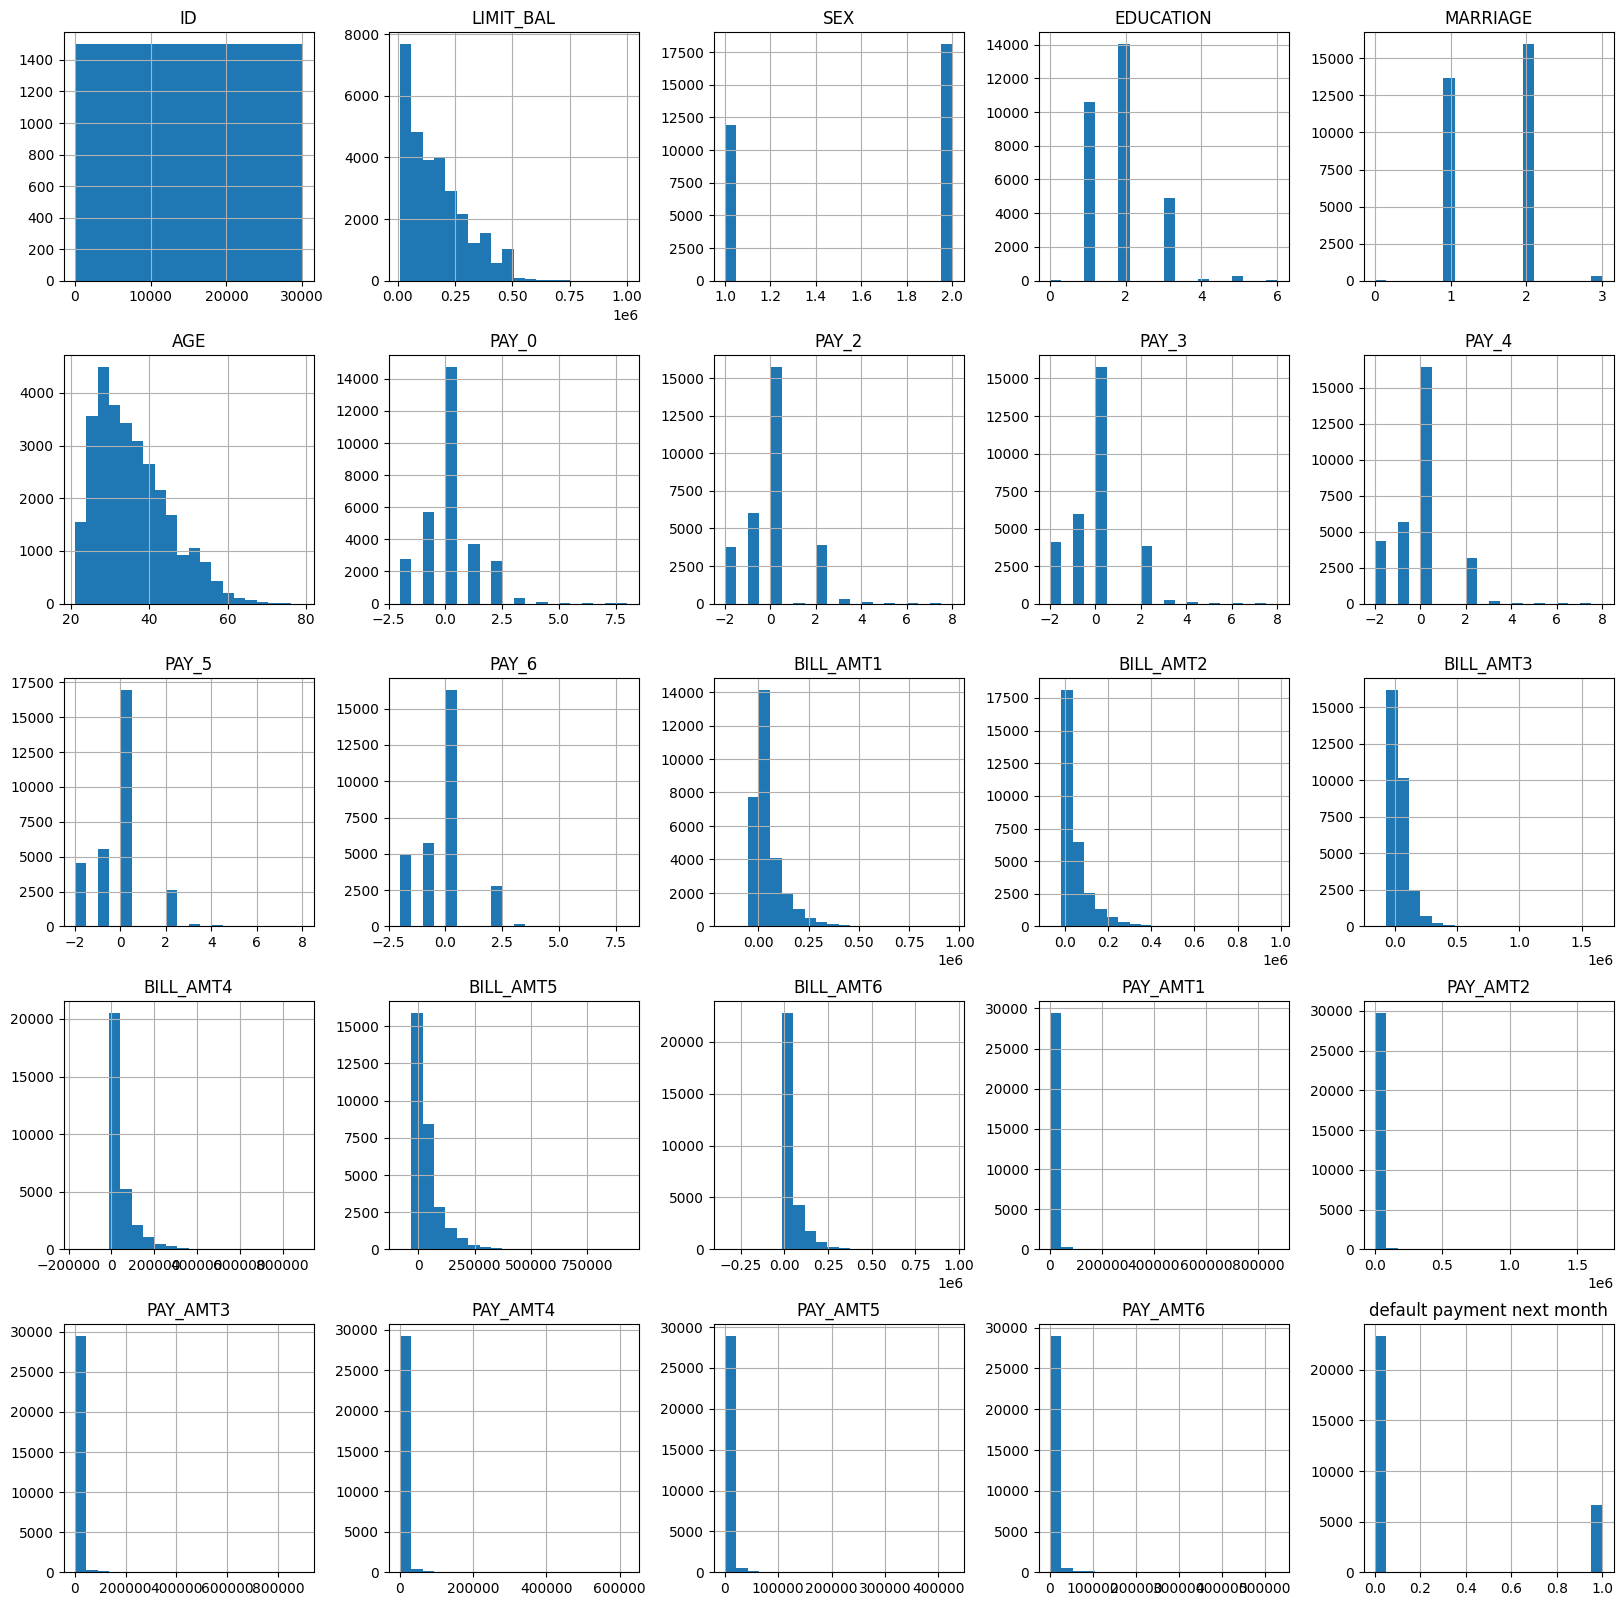

In [17]:
df_banco.hist(figsize=(20,20),bins=20)
plt.show()


Aquí buscamos obtener una visión rápida de nuestras variables. La variable 'edad' parece seguir una distribución con una cola positiva hacia la derecha. También observamos similitudes entre las variables 'pay_0', 'pay_2', 'pay_3' y 'pay_4', además de 'bill_amt1' con las variables 'bill_amt2' hasta 'bill_amt6'. Igualmente, las distribuciones de probabilidad de 'pay_amt' muestran similitudes entre las diferentes instancias. Estos patrones nos sugieren la posibilidad de que estas variables estén representando información similar o relacionada entre sí.

C:\Users\David\AppData\Local\Temp\ipykernel_28680\2066266377.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_banco['PAY_AMT1'])


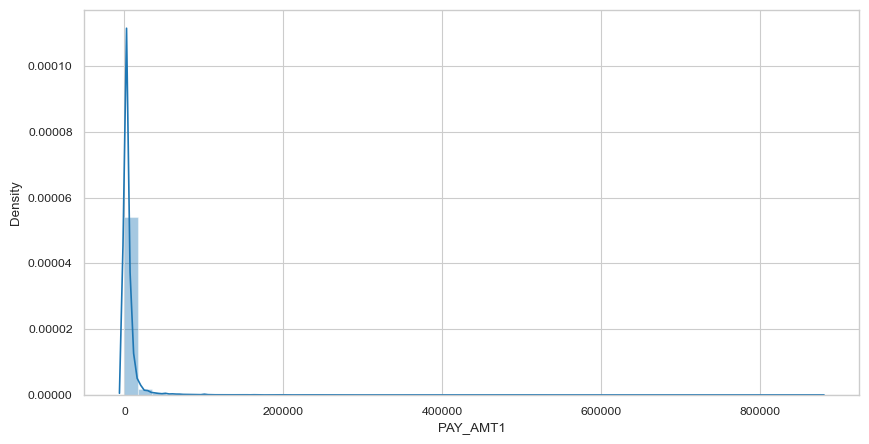

count     30000.000000
mean       5663.580500
std       16563.280354
min           0.000000
25%        1000.000000
50%        2100.000000
75%        5006.000000
max      873552.000000
Name: PAY_AMT1, dtype: float64

In [191]:
#plot the PAY_AMT1
plt.figure(figsize=(10,5))
sns.distplot(df_banco['PAY_AMT1'])
plt.show()

#describe this df_banco['PAY_AMT1']
df_banco['PAY_AMT1'].describe()





Aquí identificamos un problema potencial de valores atípicos (outliers). Observamos que la media de la variable es de 4663, con una desviación estándar considerablemente grande. Además, notamos la presencia de un valor máximo que parece ser un outlier. Esta representación gráfica nos proporciona una mejor comprensión de la variable en cuestión y resalta la necesidad de abordar la presencia de valores atípicos en nuestro análisis.

## Análisis de correlaciones


Antes de comenzar a hacer nuestro modelo vamos a ver correlaciones, para que después no tengamos un modelo de regresión donde sus coeficientes esten correlacionados y tengamos un problena de colinealidad.

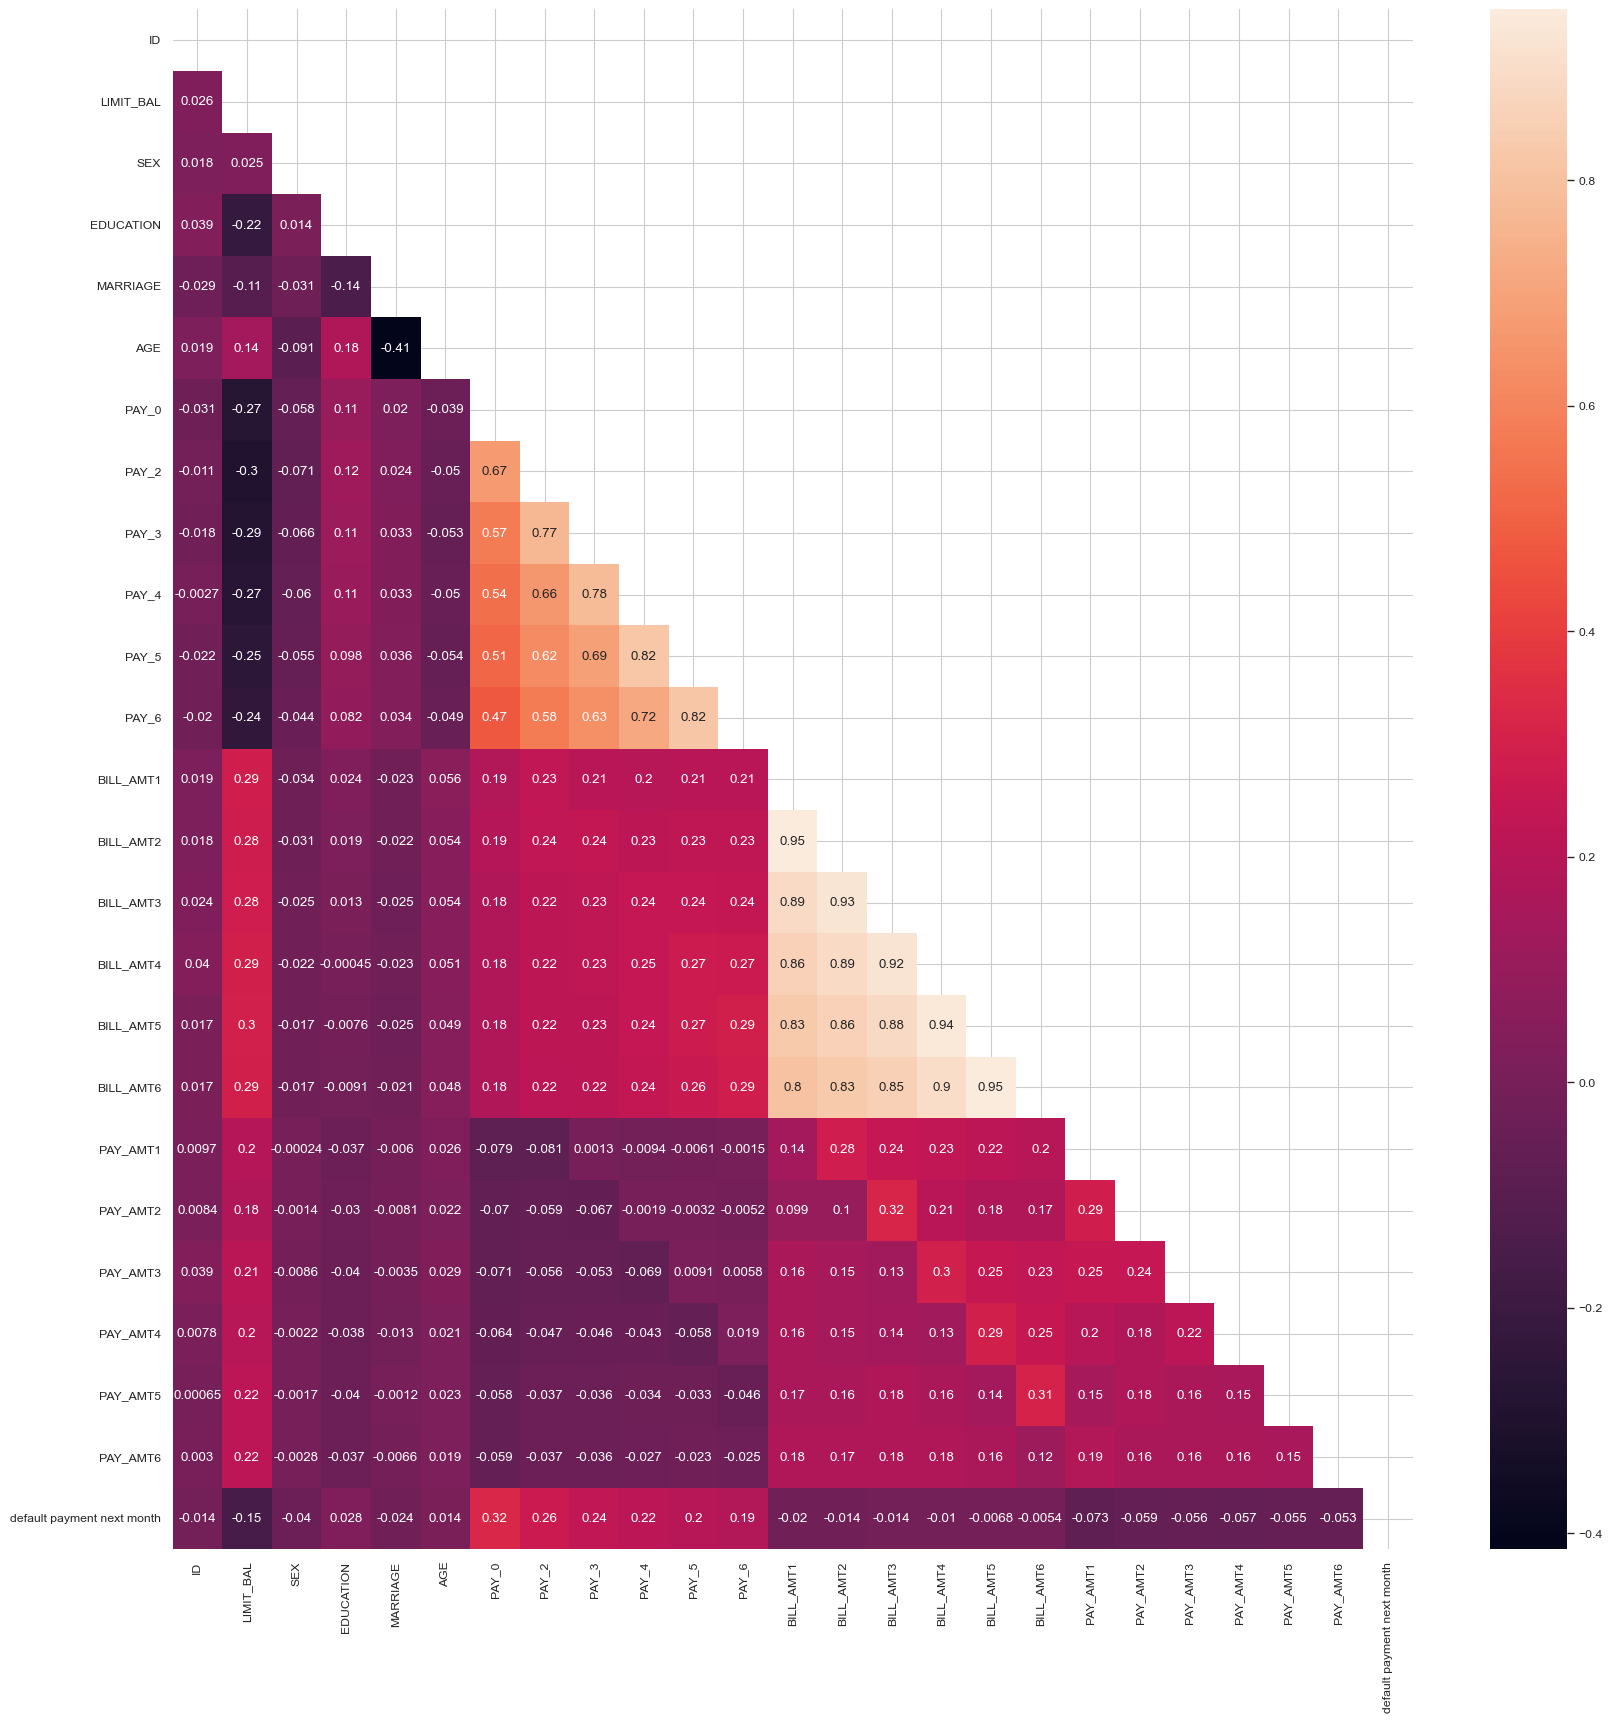

In [192]:


#graphplot the correlation matriz using sns
sns.set_style('whitegrid')
sns.set_context('paper')
plt.figure(figsize=(20, 20))
mask = np.triu(np.ones_like(df_banco.corr(), dtype=bool))
sns.heatmap(df_banco.corr(), annot=True, mask=mask)
plt.show()


Aqui vemos unas correlaciones grandes entre los datos de bill_ant1,2,3,4. Parece que una variable nos esta dando la información de las otras. Sin embargo no las vamos a eliminar del modelo. Para ver si se relacionan he influyen en nuestro R2 o si son variables muy dependientes que nos están dando la información en una variable. Y tambien con datos de pay_1 pay_2, pay_3, pay_4 vemos que hay problema de tixorrkinearidad between the repayment status features.


- Para la primera parte vamos a entrenar el modelo con todas las variables y despues vamos a ir reduciendo

## Modelo 1 (Modelo con todas las variables )

In [208]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Assuming defaulters is your DataFrame


variables_interes=['LIMIT_BAL','SEX','EDUCATION','MARRIAGE','AGE','PAY_0','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6','BILL_AMT1','PAY_AMT1','BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6',
                         'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6','default payment next month']

variable_predecir=['default payment next month']


X=df_banco[variables_interes]
y=df_banco[variable_predecir]


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

# Create and train the logistic regression model
model1 = LogisticRegression()
model1.fit(X_train, y_train)

# Make predictions
y_pred = model1.predict(X_test)

# Evaluate the model
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Accuracy Score for model1:", accuracy_score(y_test, y_pred))






c:\Users\David\anaconda3\envs\Machine_Learning\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Classification Report:
               precision    recall  f1-score   support

           0       0.78      1.00      0.88      4683
           1       0.50      0.00      0.00      1317

    accuracy                           0.78      6000
   macro avg       0.64      0.50      0.44      6000
weighted avg       0.72      0.78      0.68      6000

Confusion Matrix:
 [[4681    2]
 [1315    2]]
Accuracy Score for model1: 0.7805


c:\Users\David\anaconda3\envs\Machine_Learning\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Para nuestro modelo inicial, generamos la matriz de confusión. En ella, observamos que el modelo clasificó correctamente los casos A como A (4681 veces) y los casos B como B (1315 veces). Sin embargo, cometió errores al clasificar dos casos B como A y dos casos A como B. El índice de precisión (accuracy) de nuestro modelo es del 78%, lo que significa que acertó en el 78% de las predicciones.

- Ahora para el objetivo de interpretar, intentaremos reducir un modelo, en este caso ver las variables que más importan en nuestro modelo.

Queremos quitar de nuestro modelo las variables que tienen una correlación alta,como vimos en la primea grafica solo nos vamos a quedar con una variable de las PY_0 hasta PY_6 y nos quedamos con las variables que describen mejor si un usuario es propenso a pagar, nos quedamos con un modelo mas básico SEX','MARRIAGE','AGE','BILL_AMT1','EDUCATION','PAY_0' el cual tiene una mayor explicativilidad y la precsicon igual al modelo anterior

In [210]:



X=df_banco[['SEX','MARRIAGE','AGE','BILL_AMT1','EDUCATION','PAY_0']]
y=df_banco[variable_predecir]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

model1 = LogisticRegression()
model1.fit(X_train, y_train)

y_pred = model1.predict(X_test)

print(classification_report(y_pred, y_test))
print(confusion_matrix(y_pred, y_test))
print('\nAccuracy Score for model: ', accuracy_score(y_pred,y_test))

              precision    recall  f1-score   support

           0       1.00      0.78      0.88      6000
           1       0.00      0.00      0.00         0

    accuracy                           0.78      6000
   macro avg       0.50      0.39      0.44      6000
weighted avg       1.00      0.78      0.88      6000

[[4683 1317]
 [   0    0]]

Accuracy Score for model:  0.7805


c:\Users\David\anaconda3\envs\Machine_Learning\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\David\anaconda3\envs\Machine_Learning\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\David\anaconda3\envs\Machine_Learning\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\David\anaconda3\envs\Machine_Learning\Lib\sit

a interpretación de esta matriz indica que el modelo tiene dificultades en clasificar correctamente los casos de la clase B. Más específicamente:

   - Verdaderos positivos (A clasificado como A): 4681
   - Falsos positivos (B clasificado como A): 2
   - Falsos negativos (A clasificado como B): 1315
   - Verdaderos negativos (B clasificado como B): 2

El hecho de que el modelo tenga un rendimiento similar al modelo anterior, pero con diferencias en cómo clasifica los casos, sugiere que la selección de variables puede estar afectando la capacidad del modelo para distinguir entre las clases o puede haber un desequilibrio en las clases que afecta el rendimiento del modelo

In [207]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc,roc_auc_score
from sklearn.linear_model import LogisticRegression

# Predict probabilities instead of class labels
y_pred_prob = model1.predict_proba(X_test)[:, 1]

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Calculate AUC (Area Under the Curve)
roc_auc = auc(fpr, tpr)

roc_auc = roc_auc_score(y_test,y_pred_prob)
print('ROC AUC Score:', roc_auc)


ROC AUC Score: 0.5069999875152229


A pesar de que el área bajo la curva ROC (ROC AUC) en nuestro modelo es bastante modesta, indicando que la capacidad de discriminación es limitada y, en términos generales, lanzar una moneda podría tener resultados similares, observamos un rendimiento más alentador en términos de la tasa de precisión. La precisión, medida a través de la matriz de confusión, muestra que nuestro modelo acierta en aproximadamente el 78% de las predicciones

- Vamos a hacer el modelo en stats models para ver mejores estadisticos.

In [211]:
#plot the coeficientes
import statsmodels.api as sm
import pandas as pd


X=df_banco[['SEX','MARRIAGE','AGE','BILL_AMT1','EDUCATION','PAY_0']]
y=df_banco[variable_predecir]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

logit_model = sm.Logit(y_train, sm.add_constant(X_train))
result = logit_model.fit()

# Display the summary
summary = result.summary2()
print(summary)





Optimization terminated successfully.
         Current function value: 0.473126
         Iterations 6
                              Results: Logit
Model:              Logit                      Method:           MLE       
Dependent Variable: default payment next month Pseudo R-squared: 0.106     
Date:               2023-12-02 19:31           AIC:              22724.0593
No. Observations:   24000                      BIC:              22780.6599
Df Model:           6                          Log-Likelihood:   -11355.   
Df Residuals:       23993                      LL-Null:          -12695.   
Converged:          1.0000                     LLR p-value:      0.0000    
No. Iterations:     6.0000                     Scale:            1.0000    
------------------------------------------------------------------------------
                 Coef.     Std.Err.       z       P>|z|      [0.025     0.975]
------------------------------------------------------------------------------
const   

Tras analizar el modelo, observamos que la variable 'education' no parece ser significativa con un nivel de significancia del 5%. Por lo tanto, hemos decidido eliminar esta variable del modelo, ya que su contribución no es estadísticamente relevante. Procedemos a ajustar el modelo sin la variable 'education' y evaluaremos el nuevo modelo para determinar su eficacia y relevancia en la predicción.

### Constante (const)
El intercepto. Cuando todos los demás predictores son cero, la probabilidad logarítmica de que la variable objetivo sea 1 es aproximadamente -0.9740.

### SEXO (SEX)
Para un aumento de una unidad en SEXO (suponiendo que es una variable binaria), la probabilidad logarítmica de que la variable objetivo sea 1 disminuye aproximadamente en 0.1457. Esto implica que estar en la categoría representada por SEXO=1 disminuye las probabilidades de que la variable objetivo sea 1 en comparación con la categoría de referencia (SEXO=0).

### MATRIMONIO (MARRIAGE)
Para un aumento de una unidad en MATRIMONIO (suponiendo que es una variable binaria), la probabilidad logarítmica de que la variable objetivo sea 1 disminuye aproximadamente en 0.1341. De manera similar al SEXO, esto implica que estar en la categoría representada por MATRIMONIO=1 disminuye las probabilidades de que la variable objetivo sea 1 en comparación con la categoría de referencia (MATRIMONIO=0).

### EDAD (AGE)
Para un aumento de una unidad en EDAD, la probabilidad logarítmica de que la variable objetivo sea 1 aumenta aproximadamente en 0.0048. Esto sugiere que las personas mayores tienen más probabilidades de estar en la categoría representada por la variable objetivo siendo 1 en comparación con las personas más jóvenes.

### BILL_AMT1
Para un aumento de una unidad en BILL_AMT1, la probabilidad logarítmica de que la variable objetivo sea 1 disminuye en una cantidad muy pequeña (cerca de cero). Esto implica que hay un impacto mínimo de BILL_AMT1 en la probabilidad logarítmica.

### EDUCACIÓN (EDUCATION)
Para un aumento de una unidad en EDUCACIÓN, la probabilidad logarítmica de que la variable objetivo sea 1 disminuye aproximadamente en 0.0160. Esto sugiere que niveles educativos más altos disminuyen las probabilidades de que la variable objetivo sea 1 en comparación con niveles educativos más bajos.

### PAY_0
Para un aumento de una unidad en PAY_0, la probabilidad logarítmica de que la variable objetivo sea 1 aumenta aproximadamente en 0.7499. Esto indica que valores más altos de PAY_0 están asociados con mayores probabilidades de que la variable objetivo sea 1.

## Modelo 2

In [213]:
X=df_banco[['SEX','MARRIAGE','AGE','BILL_AMT1','EDUCATION','PAY_0']]
y=df_banco[variable_predecir]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

model1 = LogisticRegression()
model1.fit(X_train, y_train)

y_pred = model1.predict(X_test)

print(classification_report(y_pred, y_test))
print(confusion_matrix(y_pred, y_test))
print('\nAccuracy Score for model3: ', accuracy_score(y_pred,y_test))



y_pred_prob = model1.predict_proba(X_test)[:, 1]

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Calculate AUC (Area Under the Curve)
roc_auc = auc(fpr, tpr)

roc_auc = roc_auc_score(y_test,y_pred_prob)
print('ROC AUC Score:', roc_auc)

              precision    recall  f1-score   support

           0       1.00      0.78      0.88      6000
           1       0.00      0.00      0.00         0

    accuracy                           0.78      6000
   macro avg       0.50      0.39      0.44      6000
weighted avg       1.00      0.78      0.88      6000

[[4683 1317]
 [   0    0]]

Accuracy Score for model3:  0.7805
ROC AUC Score: 0.5069999875152229


c:\Users\David\anaconda3\envs\Machine_Learning\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\David\anaconda3\envs\Machine_Learning\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\David\anaconda3\envs\Machine_Learning\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\David\anaconda3\envs\Machine_Learning\Lib\sit

**Pregunta 5: Análisis Avanzado de Regresión Logística (25%)**

   - **Construcción del Modelo:** Desarrolle un modelo de regresión logística incluyendo los efectos principales de las variables, la interacción entre dos variables seleccionadas, y los efectos principales cuadráticos. 
   - **Evaluación y Conclusión:** Examine los resultados del modelo. Analice y discuta tanto las fortalezas como las debilidades identificadas. Basado en estos hallazgos, evalúe si el modelo presenta indicios de subajuste (underfitting) o sobreajuste (overfitting), justificando su conclusión.

   - **Implementación de Regularización:** Aplique las técnicas de regularización L1 y L2 al modelo de regresión logística desarrollado anteriormente.
   - **Comparación y Selección de Modelos:** Discuta las diferencias observadas entre los modelos con regularización L1 y L2. Elija el modelo que considere superior, explicando los criterios utilizados para su selección.
   - **Análisis de Variables Significativas:** Identifique y discuta cuáles son las variables más relevantes en el modelo seleccionado y explique por qué considera que estas variables son las más significativas.

## Modelo más completo

In [214]:
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
##Modelo avanzado



X=df_banco[['SEX','MARRIAGE','AGE','BILL_AMT1','EDUCATION','PAY_0']]
y=df_banco[variable_predecir]


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Polynomial features and interactions
poly = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)


feature_names_expanded = poly.get_feature_names_out(X_train.columns)

# Standardize the features
scaler = StandardScaler()
X_train_poly = scaler.fit_transform(X_train_poly)
X_test_poly = scaler.transform(X_test_poly)

# Create and train the logistic regression model
model_poly = LogisticRegression()
model_poly.fit(X_train_poly, y_train)

# Make predictions
y_pred_poly = model_poly.predict(X_test_poly)

y_train_prob=model_poly.predict_proba(X_train_poly)[:,1]
y_test_prob=model_poly.predict_proba(X_test_poly)[:,1]



coefficients = model_poly.coef_[0]
print(coefficients)
print(feature_names_expanded)
# Evaluate the model
print("Classification Report:\n", classification_report(y_test, y_pred_poly))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_poly))
print("Accuracy Score for Polynomial Model: ", accuracy_score(y_test, y_pred_poly))


[-0.12714395 -0.0978189   0.10951112 -0.27154526 -0.01074589  0.93118535
  0.10874466 -0.00440596  0.01363684 -0.02131368  0.00351976 -0.05059467
 -0.03077843  0.03785549 -0.06804625 -0.04628636 -0.00530283 -0.19039837
 -0.03702408  0.38391466 -0.0031944 ]
['SEX' 'MARRIAGE' 'AGE' 'BILL_AMT1' 'EDUCATION' 'PAY_0' 'SEX MARRIAGE'
 'SEX AGE' 'SEX BILL_AMT1' 'SEX EDUCATION' 'SEX PAY_0' 'MARRIAGE AGE'
 'MARRIAGE BILL_AMT1' 'MARRIAGE EDUCATION' 'MARRIAGE PAY_0'
 'AGE BILL_AMT1' 'AGE EDUCATION' 'AGE PAY_0' 'BILL_AMT1 EDUCATION'
 'BILL_AMT1 PAY_0' 'EDUCATION PAY_0']
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.97      0.89      4687
           1       0.69      0.28      0.40      1313

    accuracy                           0.81      6000
   macro avg       0.76      0.62      0.64      6000
weighted avg       0.80      0.81      0.78      6000

Confusion Matrix:
 [[4523  164]
 [ 949  364]]
Accuracy Score for Polynomial Model:  0.

c:\Users\David\anaconda3\envs\Machine_Learning\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


- Para este modelo, generamos un polinomio de grado dos para cada variable e incluimos todas las interacciones posibles con las variables del modelo seleccionadas anteriormente (aquellas que no tienen problemas de colinealidad). Observamos que nuestro modelo mejora significativamente, ya que la matriz de confusión presenta más valores correctamente clasificados (a como a y b como b), y el puntaje de precisión alcanza un 0.81.
- Sin embargo, en cuanto al análisis, los resultados se vuelven más complejos de interpretar. Aunque mejoramos en la capacidad predictiva, perdemos claridad en el análisis debido a la inclusión de variables como 'MT1', 'SEX EDUCATION', 'SEX PAY_0', 'MARRIAGE AGE', 'MARRIAGE BILL_AMT1', las cuales son difíciles de interpretar pero contribuyen a una mejor predicción.

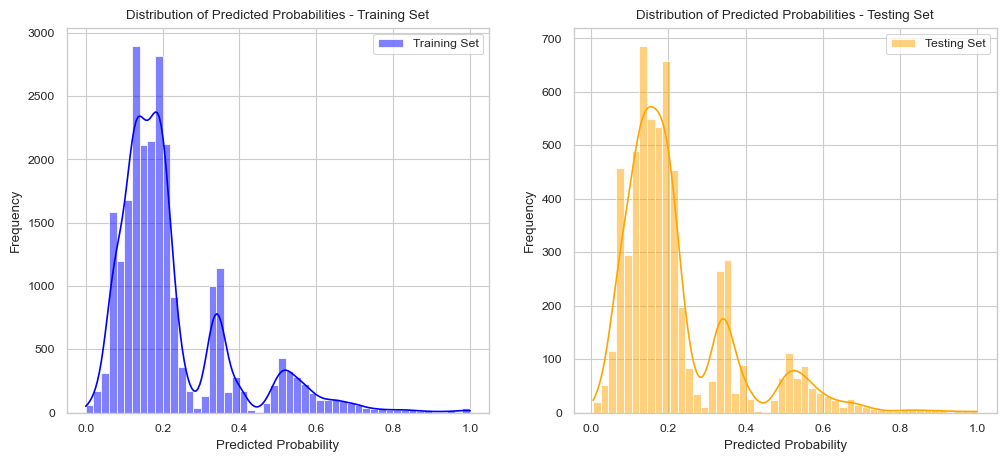

In [215]:
plt.figure(figsize=(12, 5))

# Plot for the training set
plt.subplot(1, 2, 1)
sns.histplot(y_train_prob, bins=50, kde=True, color='blue', label='Training Set')
plt.title('Distribution of Predicted Probabilities - Training Set')
plt.xlabel('Predicted Probability')
plt.ylabel('Frequency')
plt.legend()

# Plot for the testing set
plt.subplot(1, 2, 2)
sns.histplot(y_test_prob, bins=50, kde=True, color='orange', label='Testing Set')
plt.title('Distribution of Predicted Probabilities - Testing Set')
plt.xlabel('Predicted Probability')
plt.ylabel('Frequency')
plt.legend()

- Esta gráfica la generamos para evaluar la similitud o diferencia entre las dos distribuciones de probabilidad. Si tuviéramos dos distribuciones muy diferentes, estaríamos enfrentando un problema de sobreajuste (overfitting), donde el modelo se ajustaría demasiado a los datos de prueba pero no generalizaría bien. En nuestro caso, al observar que las distribuciones son similares, indicaría un buen rendimiento del modelo.

In [218]:
y_train_pred = model_poly.predict(X_train_poly)

# Predictions on the testing set
y_test_pred = model_poly.predict(X_test_poly)

# Calculate accuracy scores
accuracy_train = accuracy_score(y_train, y_train_pred)
accuracy_test = accuracy_score(y_test, y_test_pred)

print(f"Accuracy on Training Set: {accuracy_train:.4f}")
print(f"Accuracy on Testing Set: {accuracy_test:.4f}")

Accuracy on Training Set: 0.8160
Accuracy on Testing Set: 0.8145


- Nuestro modelo se ajusta tanto a los datos de prueba como a los datos de entrenamiento, lo que indica que no está sobreajustado. Si estuviera sobreajustado, observaríamos buenos resultados en los datos de entrenamiento pero resultados significativamente diferentes en los datos de prueba. En nuestro caso, el modelo presenta un puntaje muy bueno en los datos de prueba, que es la evaluación más relevante.

## Ridge y Lasso

In [227]:

from sklearn.linear_model import LogisticRegressionCV


X=df_banco[['SEX','MARRIAGE','AGE','BILL_AMT1','EDUCATION','PAY_0']]
y=df_banco[variable_predecir]


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Polynomial features and interactions
poly = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Standardize the features
scaler = StandardScaler()
X_train_poly = scaler.fit_transform(X_train_poly)
X_test_poly = scaler.transform(X_test_poly)

# Create and train the logistic regression model
lasso_log_reg_cv = LogisticRegressionCV(cv=5, penalty='l1', solver='liblinear', random_state=42)
lasso_log_reg_cv.fit(X_train_poly, y_train)


ridge_log_reg_cv = LogisticRegressionCV(cv=5, penalty='l2', random_state=42)
ridge_log_reg_cv.fit(X_train_poly, y_train)



# Make predictions
y_pred_lasso = lasso_log_reg_cv.predict(X_test_poly)
y_pred_ridge = ridge_log_reg_cv.predict(X_test_poly)





c:\Users\David\anaconda3\envs\Machine_Learning\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\David\anaconda3\envs\Machine_Learning\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [228]:
print('Lasso Logistic Regression')
print(confusion_matrix(y_test, y_pred_lasso))
print(accuracy_score(y_test, y_pred_lasso))
print(classification_report(y_test, y_pred_lasso))
print('ROC AUC:', roc_auc_score(y_test, lasso_log_reg_cv.predict_proba(X_test_poly)[:, 1]))


Lasso Logistic Regression
[[4521  166]
 [ 944  369]]
0.815
              precision    recall  f1-score   support

           0       0.83      0.96      0.89      4687
           1       0.69      0.28      0.40      1313

    accuracy                           0.81      6000
   macro avg       0.76      0.62      0.65      6000
weighted avg       0.80      0.81      0.78      6000

ROC AUC: 0.7116963661704012


- Vemos que nuestro modelo mejoro solo un poco en el score siendo 0.815, pero en el Roc auc paso de 0.5 a 0.71 en el modelo de Lasso y Ridge lo que hace nuestro modelo sea mas robusto, y con menos variables que las que teniamos, en comparación con ridge y lasso no hay mucha diferencia. Sin embargo el mejor accuracy que pudimos obtener calculado por la matriz de confución fue de 0.815 con el Roc mas alto de 0.711

In [229]:
print('Ridge Logistic Regression')
print(confusion_matrix(y_test, y_pred_ridge))
print(accuracy_score(y_test, y_pred_ridge))
print(classification_report(y_test, y_pred_ridge))
print('ROC AUC:', roc_auc_score(y_test, ridge_log_reg_cv.predict_proba(X_test_poly)[:, 1]))

print(f"Accuracy on Training Set: {accuracy_train:.4f}")
print(f"Accuracy on Testing Set: {accuracy_test:.4f}")



Ridge Logistic Regression
[[4525  162]
 [ 945  368]]
0.8155
              precision    recall  f1-score   support

           0       0.83      0.97      0.89      4687
           1       0.69      0.28      0.40      1313

    accuracy                           0.82      6000
   macro avg       0.76      0.62      0.65      6000
weighted avg       0.80      0.82      0.78      6000

ROC AUC: 0.7117811886225467
Accuracy on Training Set: 0.8160
Accuracy on Testing Set: 0.8145


In [230]:
# Make predictions for Lasso and Ridge models on both training and testing sets
y_pred_lasso_train = lasso_log_reg_cv.predict(X_train_poly)
y_pred_lasso_test = lasso_log_reg_cv.predict(X_test_poly)

y_pred_ridge_train = ridge_log_reg_cv.predict(X_train_poly)
y_pred_ridge_test = ridge_log_reg_cv.predict(X_test_poly)

# Calculate accuracy for Lasso model
accuracy_lasso_train = accuracy_score(y_train, y_pred_lasso_train)
accuracy_lasso_test = accuracy_score(y_test, y_pred_lasso_test)
print(f"Lasso Model Accuracy on Training Set: {accuracy_lasso_train:.4f}")
print(f"Lasso Model Accuracy on Testing Set: {accuracy_lasso_test:.4f}")

# Calculate accuracy for Ridge model
accuracy_ridge_train = accuracy_score(y_train, y_pred_ridge_train)
accuracy_ridge_test = accuracy_score(y_test, y_pred_ridge_test)
print(f"Ridge Model Accuracy on Training Set: {accuracy_ridge_train:.4f}")
print(f"Ridge Model Accuracy on Testing Set: {accuracy_ridge_test:.4f}")


Lasso Model Accuracy on Training Set: 0.8166
Lasso Model Accuracy on Testing Set: 0.8150
Ridge Model Accuracy on Training Set: 0.8155
Ridge Model Accuracy on Testing Set: 0.8155


Al final, el modelo Ridge nos proporciona un mejor resultado, siendo coherente tanto en el conjunto de prueba como en el de entrenamiento. Este resultó ser el modelo más efectivo para nuestras predicciones.